# Projet Machine Learning - Notebook R

---


In [1]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")
#install.packages("Metrics")

In [2]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(Metrics)

Warning message:
"le package 'tidyr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'ggfortify' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'GGally' a été compilé avec la version R 4.3.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"le package 'corrplot' a été compilé avec la version R 4.3.3"
corrplot 0.92 loaded

Warning message:
"le package 'FactoMineR' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'factoextra' a été compilé avec la version R 4.3.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"le package 'Metrics' a été compilé avec la version R 4.3.3"


In [3]:
# Chargement des données :
path <- ""
data = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)

## Analyse Exploratoire des données

---

### Affichage et transformation des données 

In [4]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Notre jeu de données "data" est un data frame contenant
- 3649 observations (lignes), 1 par annéee par pays pour chaque variable. Certaines valeurs sont manquantes. 
- 21 variables (colonnes)

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

In [5]:
# Transformation des données (qualitatif/quantitatif)

data$Entity = as.factor(data$Entity) # ok : 176 niveaux : 176 pays : ok
data$Year = as.factor(data$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

### Analyse des valeurs manquantes 

In [6]:
B = summary(data) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage

Val_Manquante

,Type,Val
,<chr>,<dbl>
Entity,(Other),96.54699918
Year,(Other),71.22499315
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082


D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (colonne 5)
- Financial.flows.to.developping.countries..US... (colonne 6)
- Renewables....equivalent.primary.energy (colonne 15)

#### Suppression des variables contenant trop de valeur manquantes : 

In [7]:
data = data[,c(-5, -6, -15)]
str(data) # ok c'est le bon truc

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

#### Suppressions des individus (lignes) contenant des valeurs manquantes 

In [8]:
# On supprime les lignes contenant des valeurs manquantes 
data = na.omit(data)

In [9]:
# on renomme nos variables car les noms sont trop longs.
colnames(data) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
                     "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
                     "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

summary(data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

                 Entity          Year      Access_to_elec    Access_to_fuels 
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy_share Elec_from_fossils  Elec_from_nuclear
 Min.   : 0.000         Min.   :   0.000   Min.   :  0.00   
 1st Qu.: 9.188         1st Qu.:   0.290   1st Qu.:  0.00   
 Median :28.790         Median :   2.995   Median :  0.00   
 Mean   :35.802         Mean   :  76.694   Mean   : 15.34   
 3rd Qu.:60.667         3rd Qu.:  25.788   3rd Qu.:  0.00   
 Max.   :9

On a bien 2868 lignes et nos noms de variables ont bien été modifiés

### Analyse unidimensionnelle

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrics tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

#### Boxplot sur les variables quantitatives

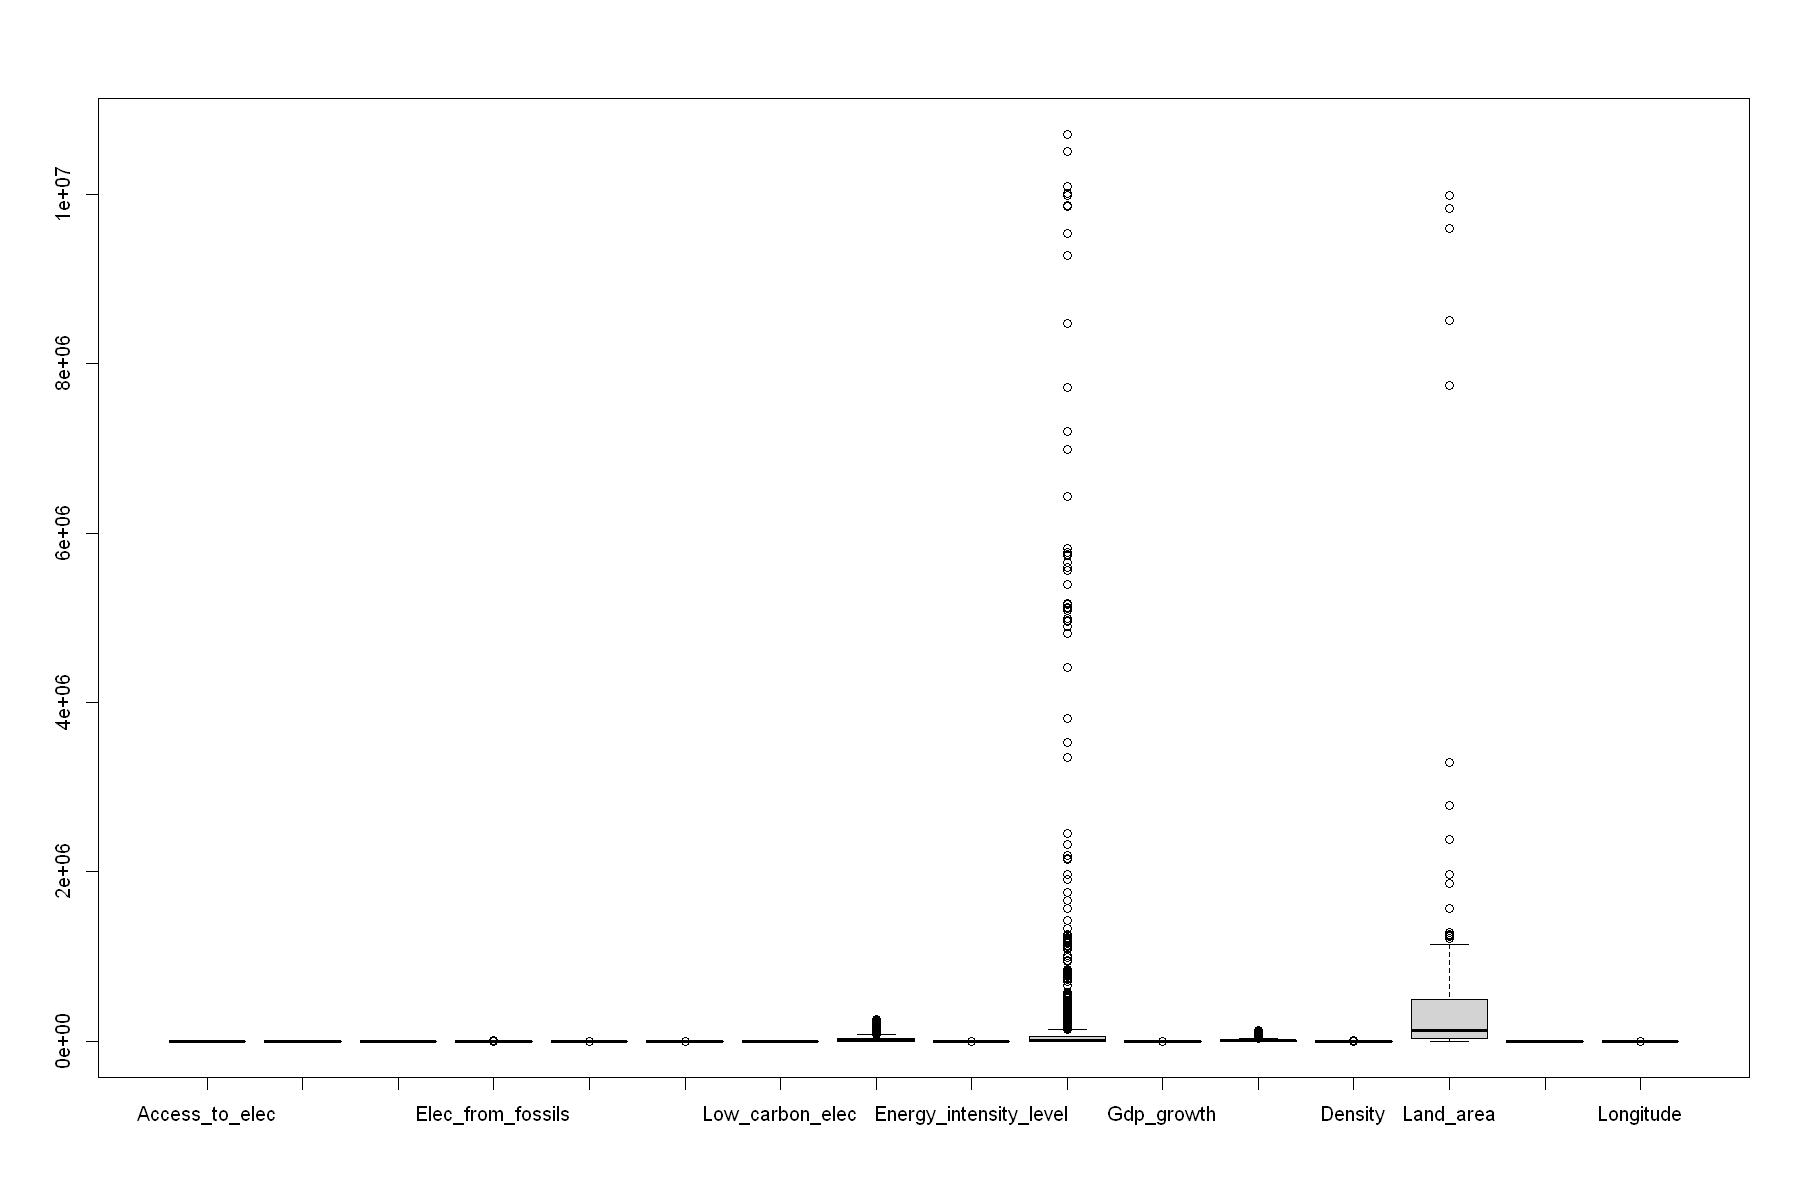

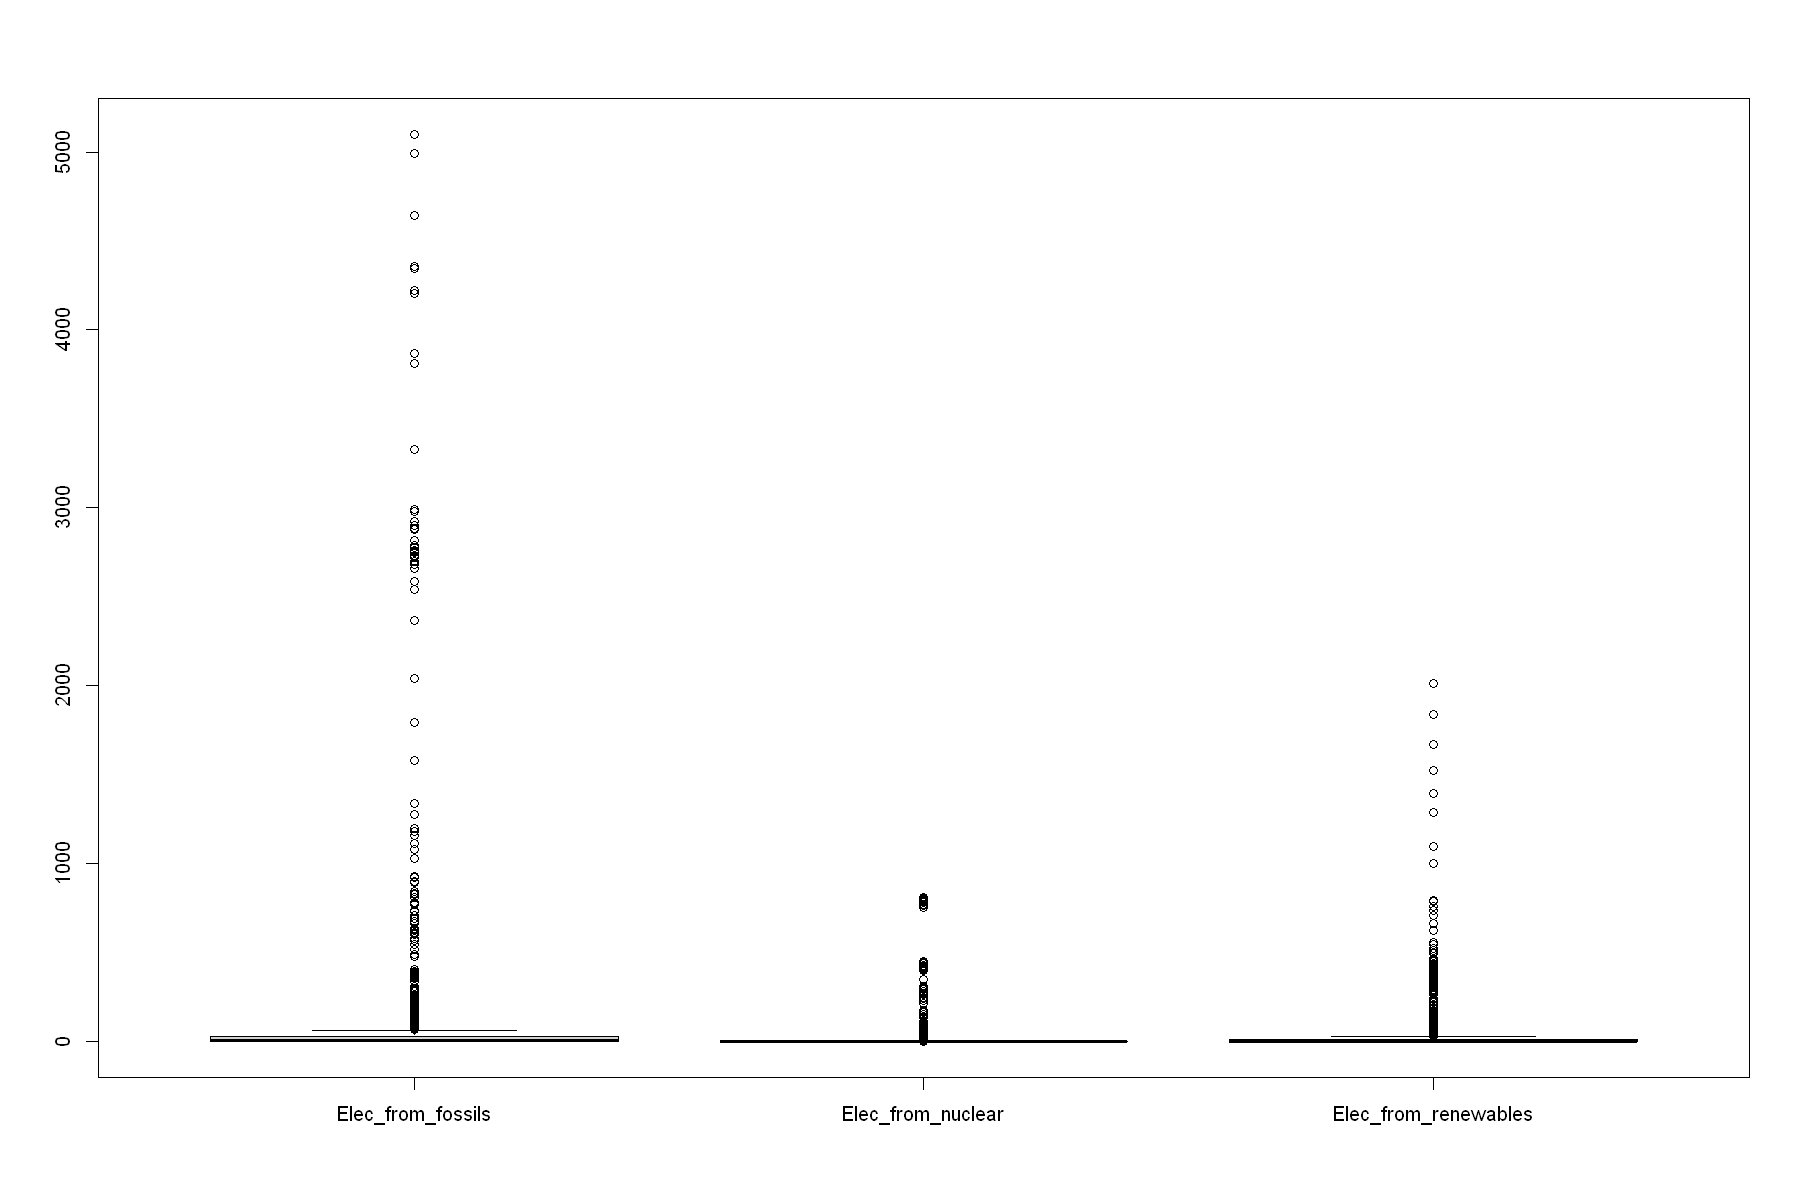

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)

boxplot(data[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

Nos variables sont données dans des unités différentes qui ne sont donc pas comparables entres-elles. C'est pourquoi le premier boxplot n'est pas interprétable. 

Le second pris sur les relevés d'éléctricité (même échelle) montre la présence de nombreux outliers. 

#### Histogramme des variables qualitatives 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

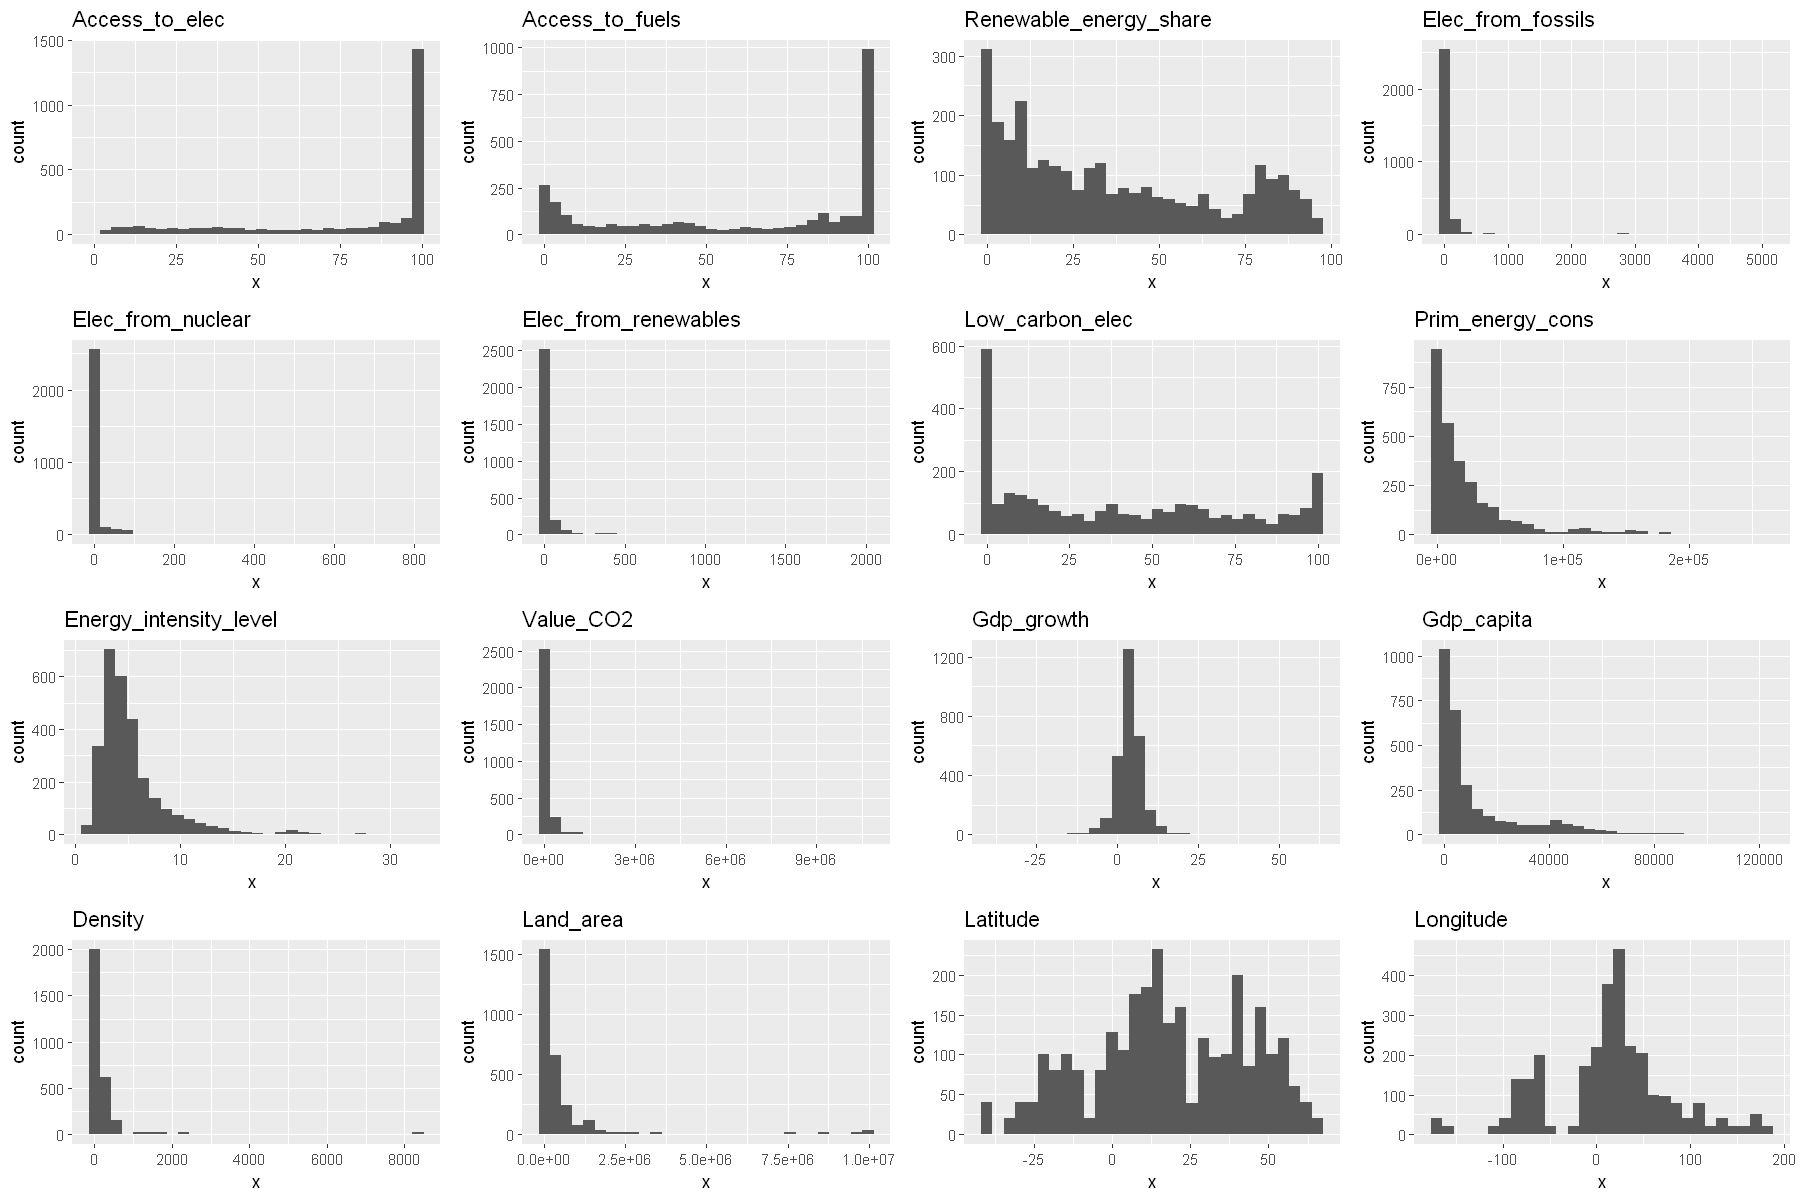

In [11]:
p = list()
j=1

for (i in names(data)){
    # on affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        data_copy <- data[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

D'après les histogrammes, on peut voir que certaines varibales ont une grande variance et ne sont pas également réparties. Afin de mieux pouvoir les interpréters et proposer un meilleur modèle de prédiciton nous allons les ajuster par une transformation gausienne. 

On seffectue une transformation logarythmique sur les variables suivantes : 
 

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data[, i] + 1):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 225 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick be

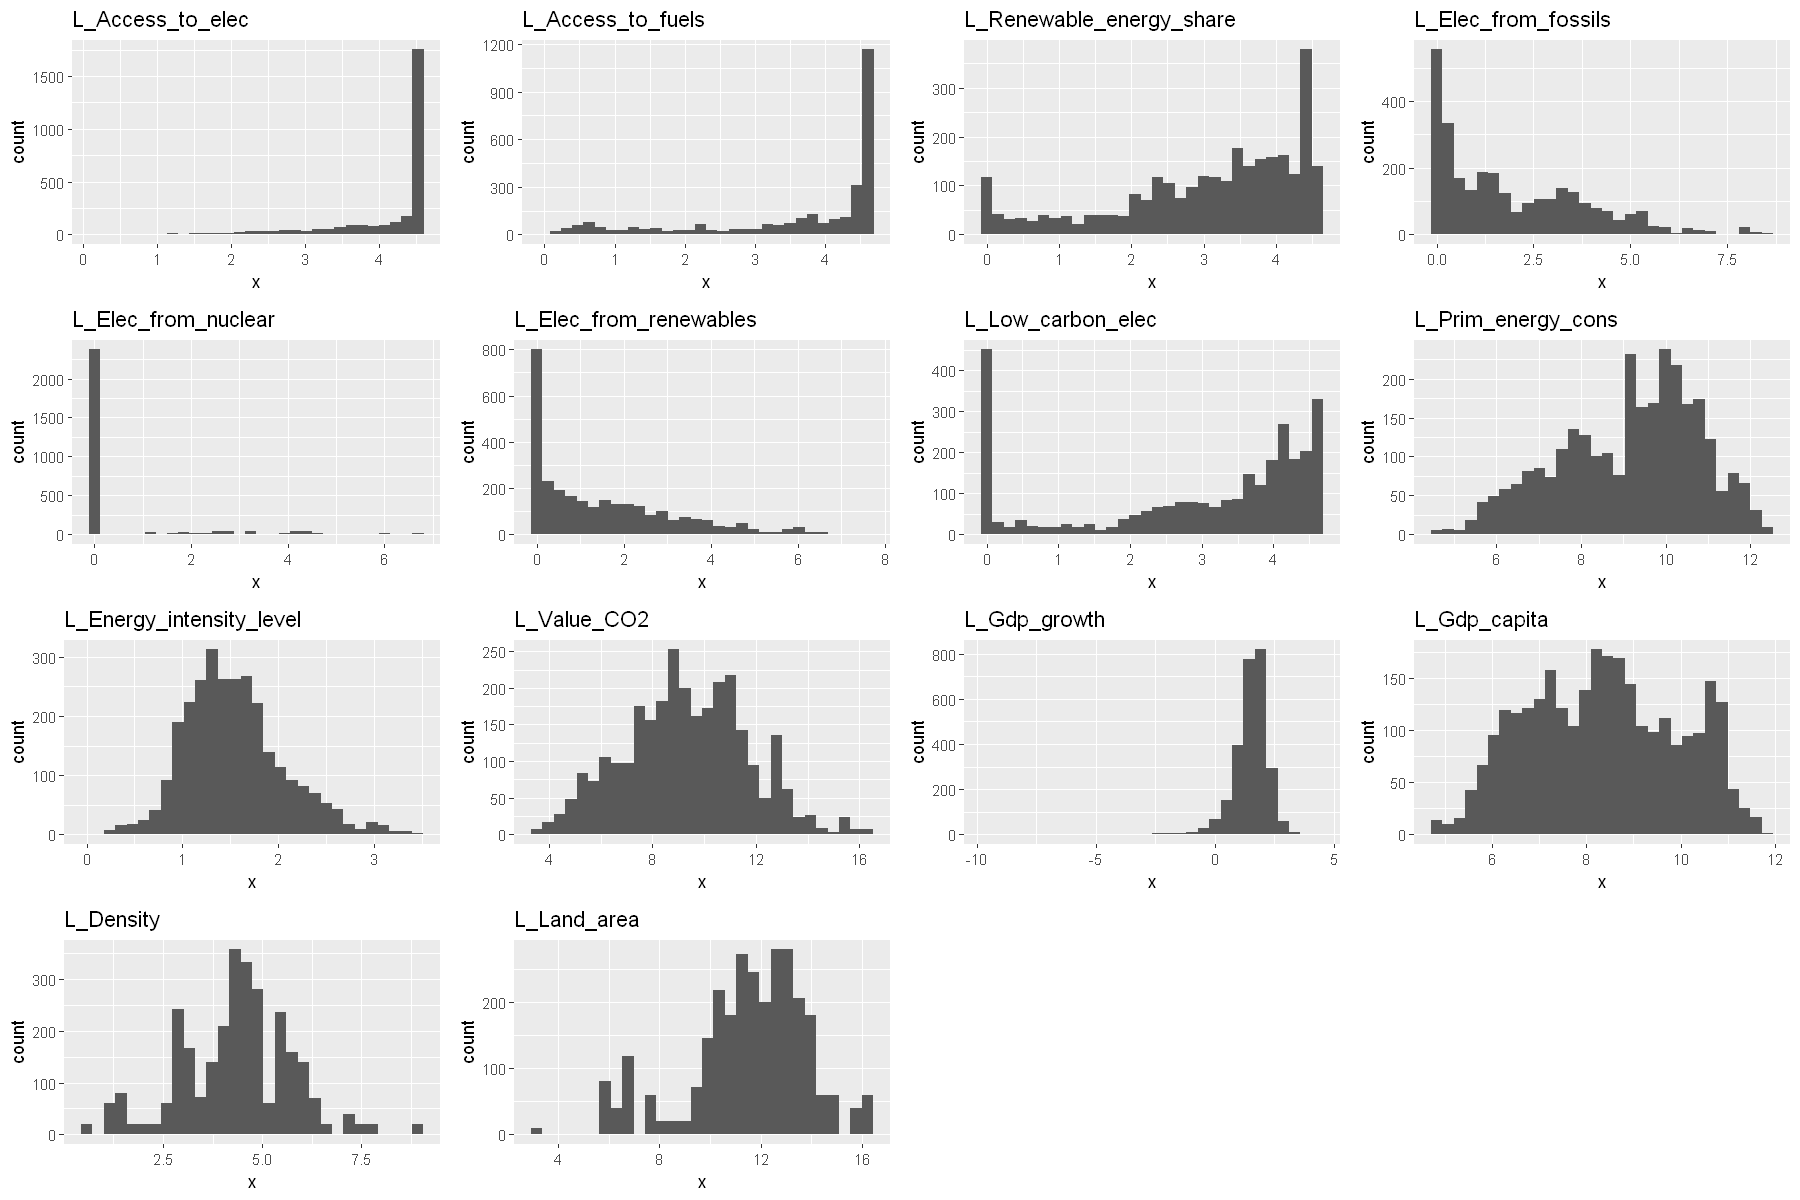

In [12]:
l = list()

# Mettre que les variables que l'on veut changer / ne pas log tout directement

Var_names = names(data[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data[,L_var] <- log(data[,i])
        } else {
            print(i)
            data[,L_var] <- log(data[,i]+1)
        }
        data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

Nous garderons les transformations qui ont permi de recentrer nos données. 

In [13]:
data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,28,13,30,31,32,17,18)]
str(data_centre)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ L_Value_CO2             : num  7.11 6.94 7.35 7.47 7.48 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

**Les variables quantitatives**

Comme on a enlevé les lignes contenant des données manquantes, certains pays ont moins de relevé par années que d'autres. Il est important de prendre cela en compte. C'est ce qu'on observe sur ce pie, certaines années ont plus de valeurs que d'autres (et on voit assez bien qu'on a globalement beaucoup plus de données sur les années récentes, et que plus les relevés sont lointains moins on a de données.

**Grande hétérogéneite de CO2**

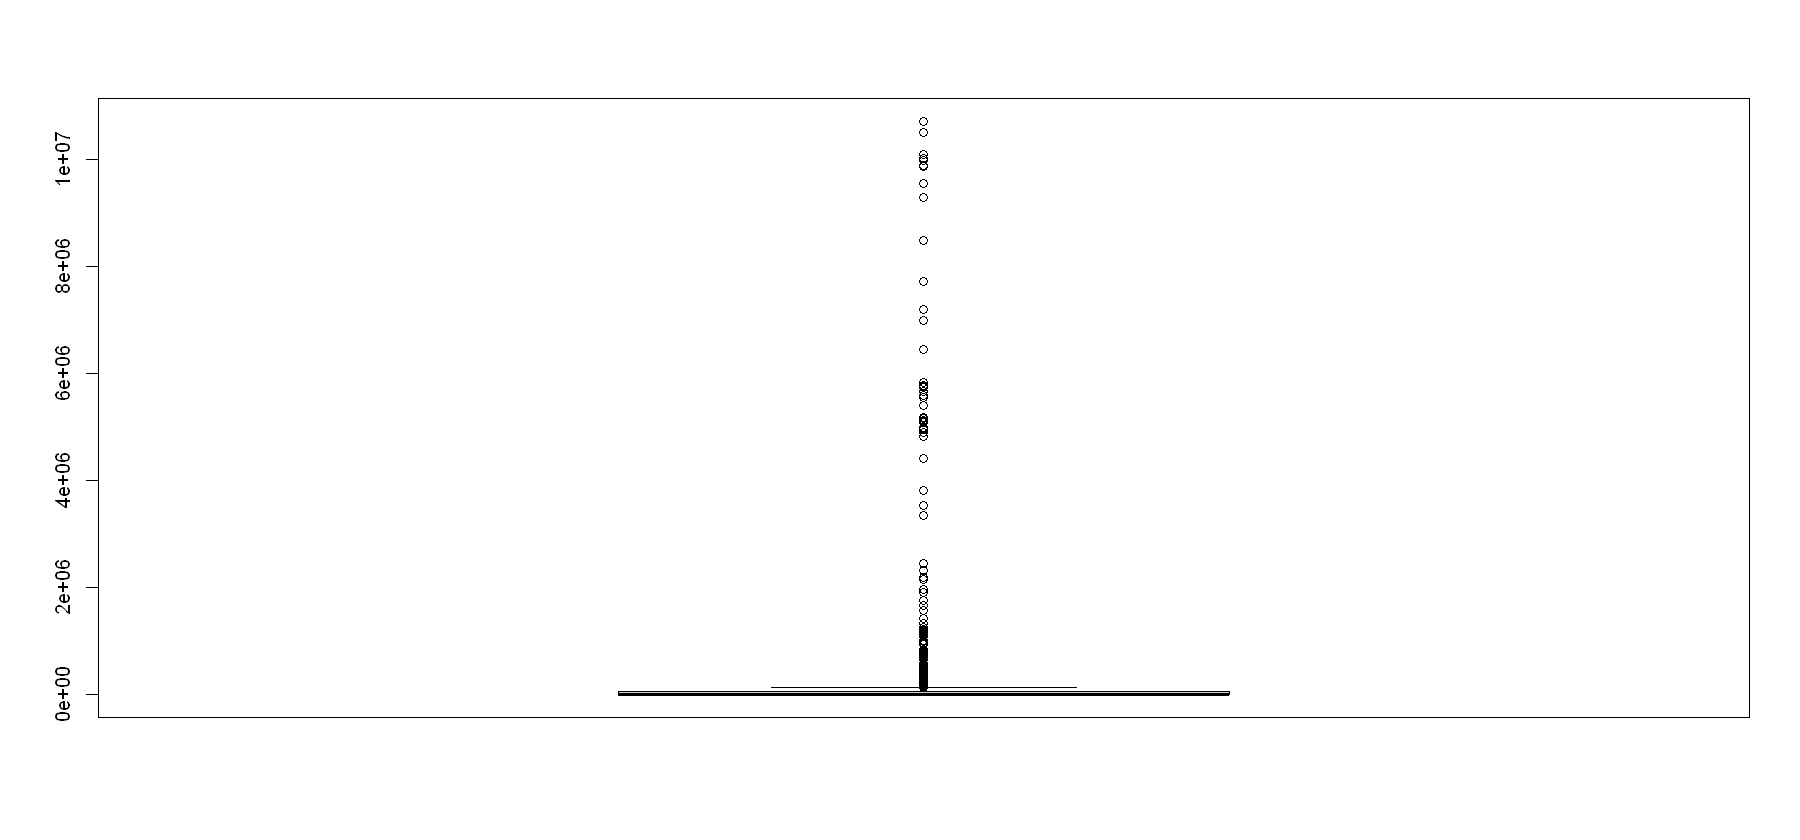

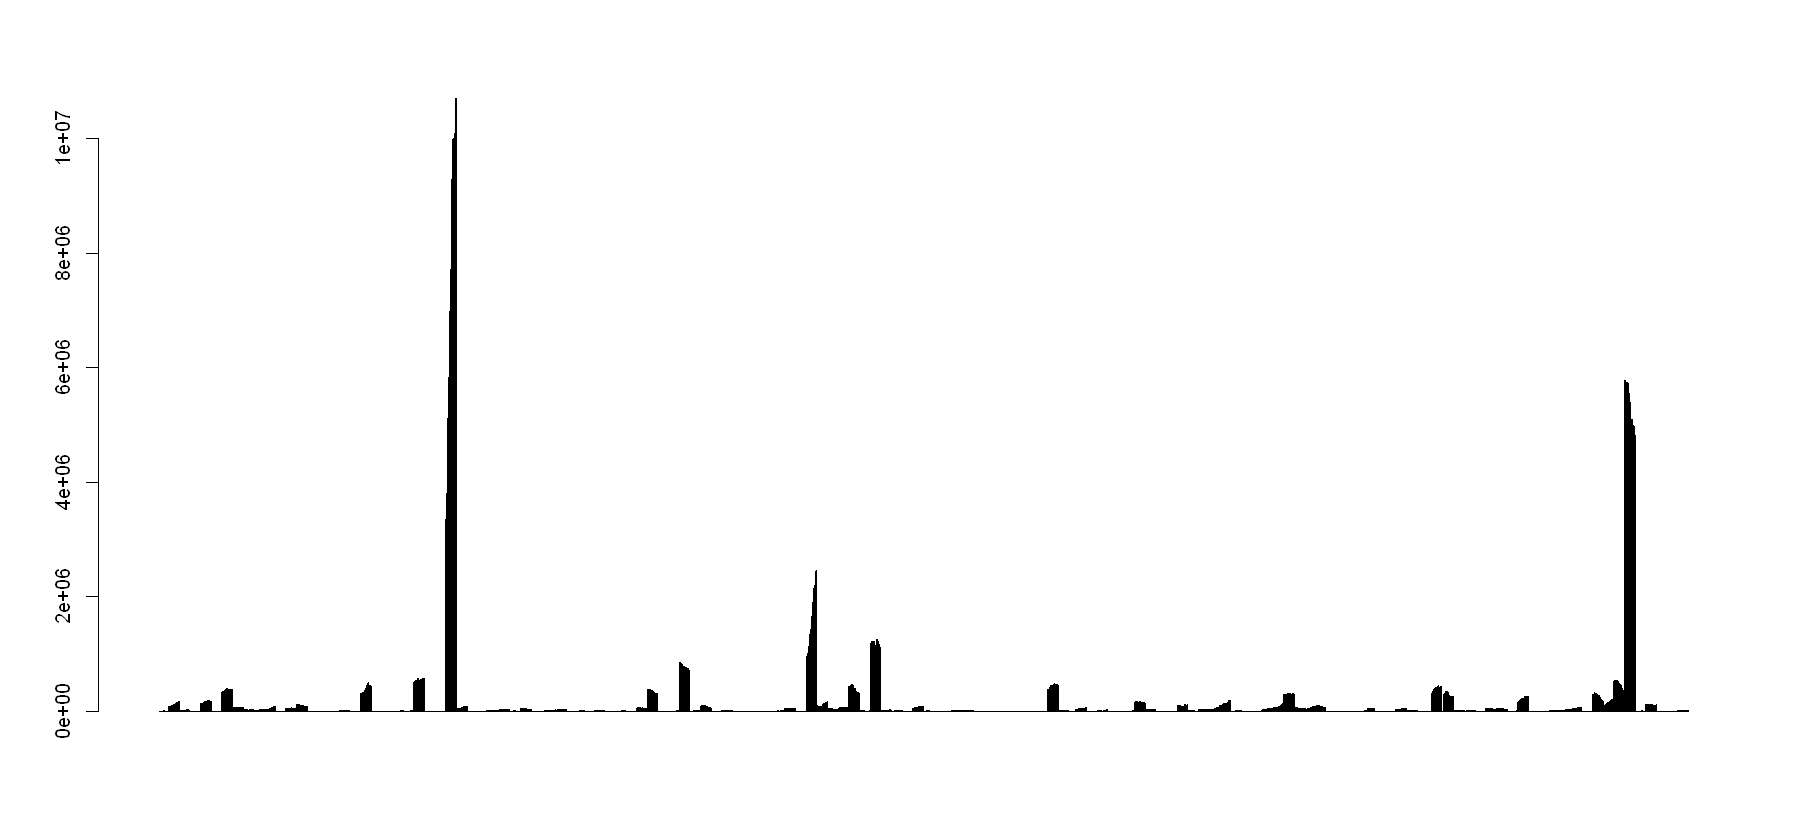

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,12])
barplot(data[,12])

In [15]:
# Attention dans cette cellule il y avait encore du data4 alors qu'il me seblait les avoir tous enlevés..
# Je viens de les re-enlever
# Si jamais il y a un petit problème c'est que j'ai peut être mal fait les modifications ?

nb_annee_pays = list()

j=1

for (i in levels(data_centre[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data_centre$Entity))
    j=j+1
}

moy_pays_co2 = list() ## TESTER AFFICHER SUR UNE MAP

No = 1

for (j in levels(data[["Entity"]])) {
    data_sub = subset(data_centre, data$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_pays_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_pays_co2 = data.frame(moy_pays_co2)

colnames(moy_pays_co2) = levels(data[["Entity"]])

# head(moy_pays_co2)

# order(moy_pays_co2)

moy_pays_co2 = t(moy_pays_co2)

colnames(moy_pays_co2) = c("Moyenne_CO2")

#head(moy_pays_co2)

moy_ordonnee = order(moy_pays_co2, decreasing=TRUE)

head(moy_pays_co2[moy_ordonnee,])

China United States         India         Japan       Germany 
     15.78308      15.48658      14.25228      13.98342      13.55689 
       Canada 
     13.21272

En faisant une moyenne de la consommation de CO2 (en metric tones per capita) des différents pays sur les années observées, on observe que les pays les plus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

Le boxplot présente de nombreux outliers traduisant une hétérogénéité importante poru la variable CO2. 

On retrouve le même résultat avec le barplot, celui présente des pics à plus de 10e7 alors que les autres valeurs sont autour de 0. 

### Analyse Descriptive Multidimensionnelle

---

On va ici regarder comment les variables intéragissent entre elles, leurs corrélations, etc.

On effectue cette analyse sur le jeu de données centrée (*ie* avec le jeux contenant mles varibales que l'on a décidé de transformer par un log)

In [16]:
#str(data)
#str(data_centre)

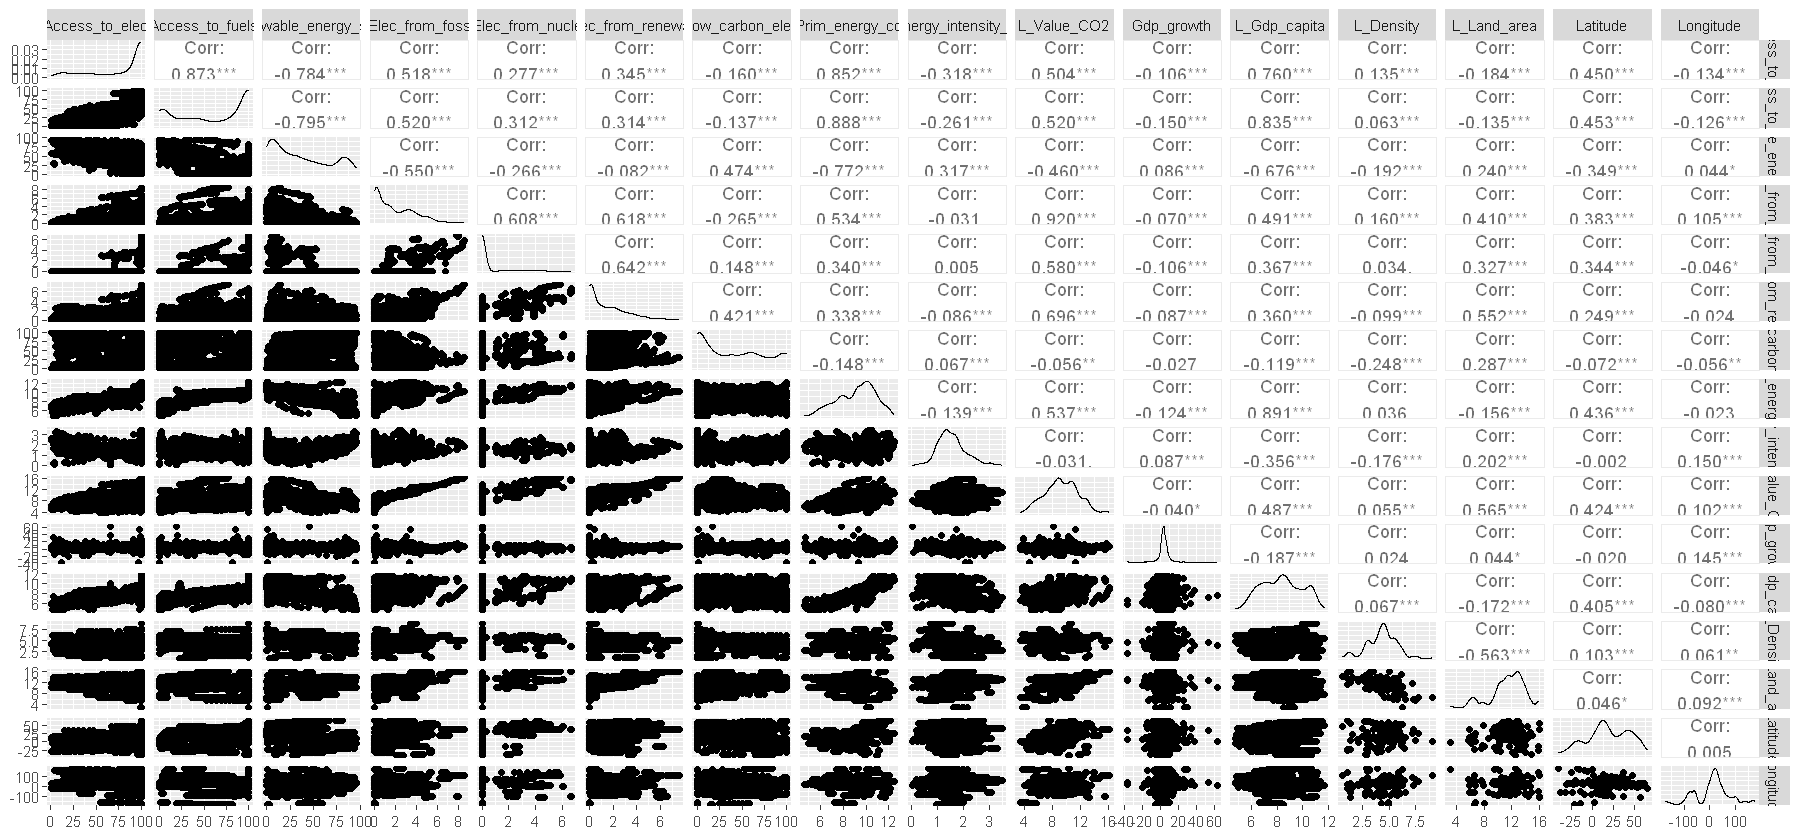

In [17]:
# on regarde les dépendances 2 à 2
ggpairs(data_centre[,c(3:18)])

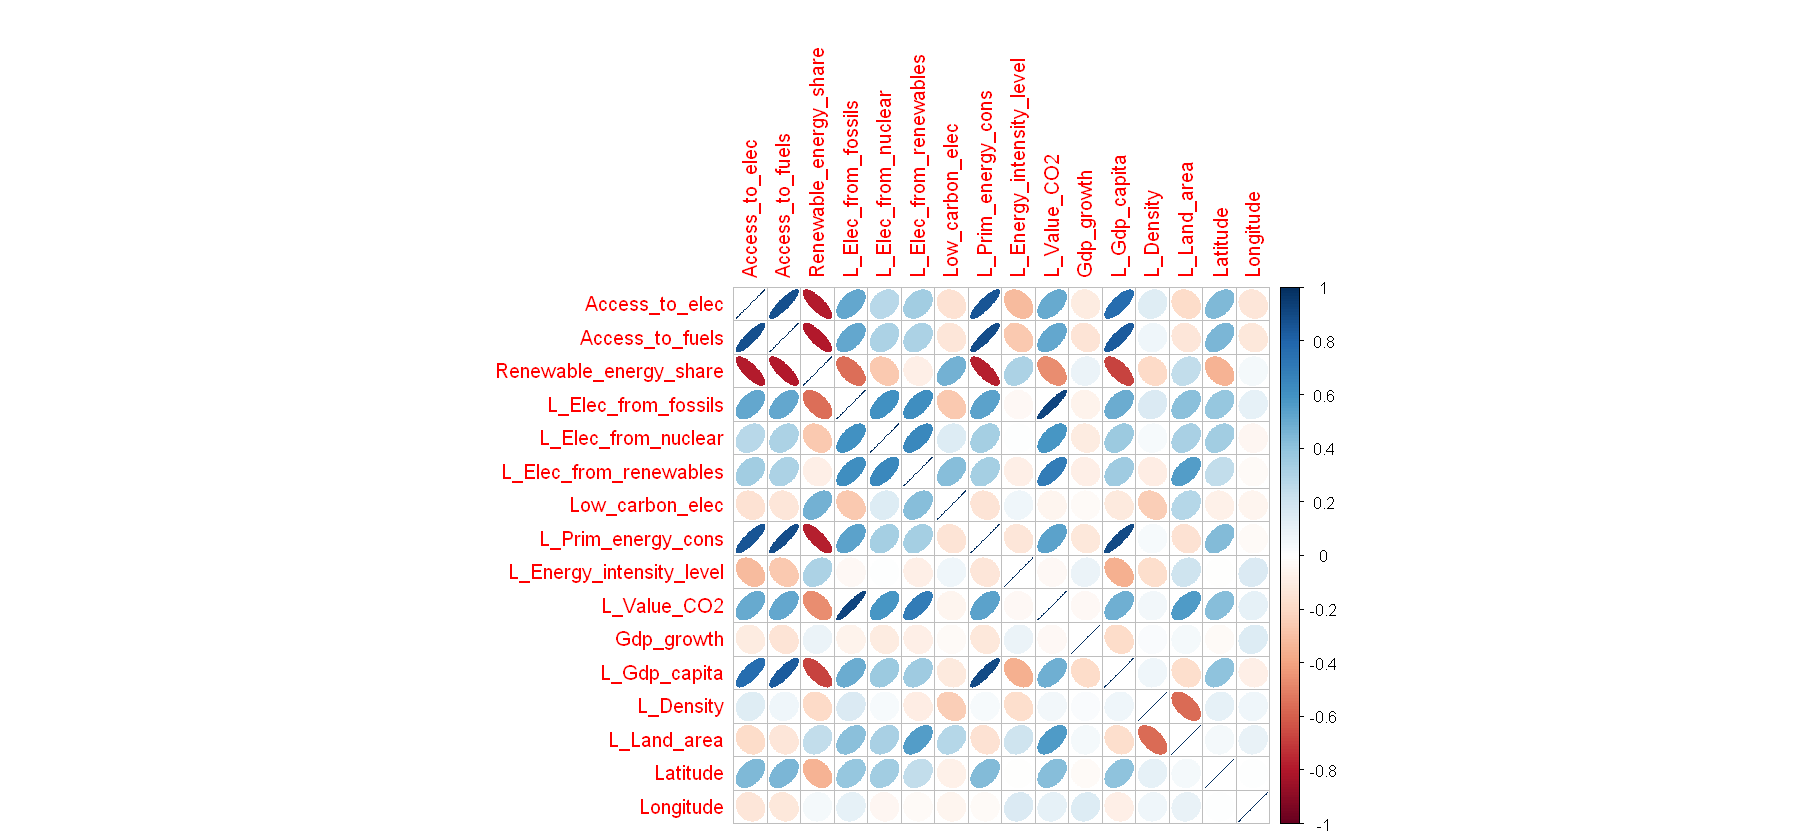

In [18]:
corrplot(cor(data_centre[,3:18]), method="ellipse")

**Interprétation**

D'après le graphe des corrélations, on peut remarquer des corrélations positives :
- Fortes entre :Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- Plus faiblement : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables

On peut aussi observer des corrélations négatives entre : 
- Fortes entre : Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- Plus faiblement : L_Land_area et L_Density

Concernant la variable C02 : 
- Elle est corrélée positivement avec les trois variables élec.

- Il semble exister des corrélations avec la latitude mais pas spécialiement avec la longitude : il semble que le critère sur la position Nord/Sud du pays ait un lien avec sa produciton de CO2. Un pays plus au Nord aurait tendance à produire plus de CO2. 

La longitude et le Gdp growth ne semble pas être corrélés aux autres variables. 

#### Comaprons les corrélations log avec les données non modifiées : 

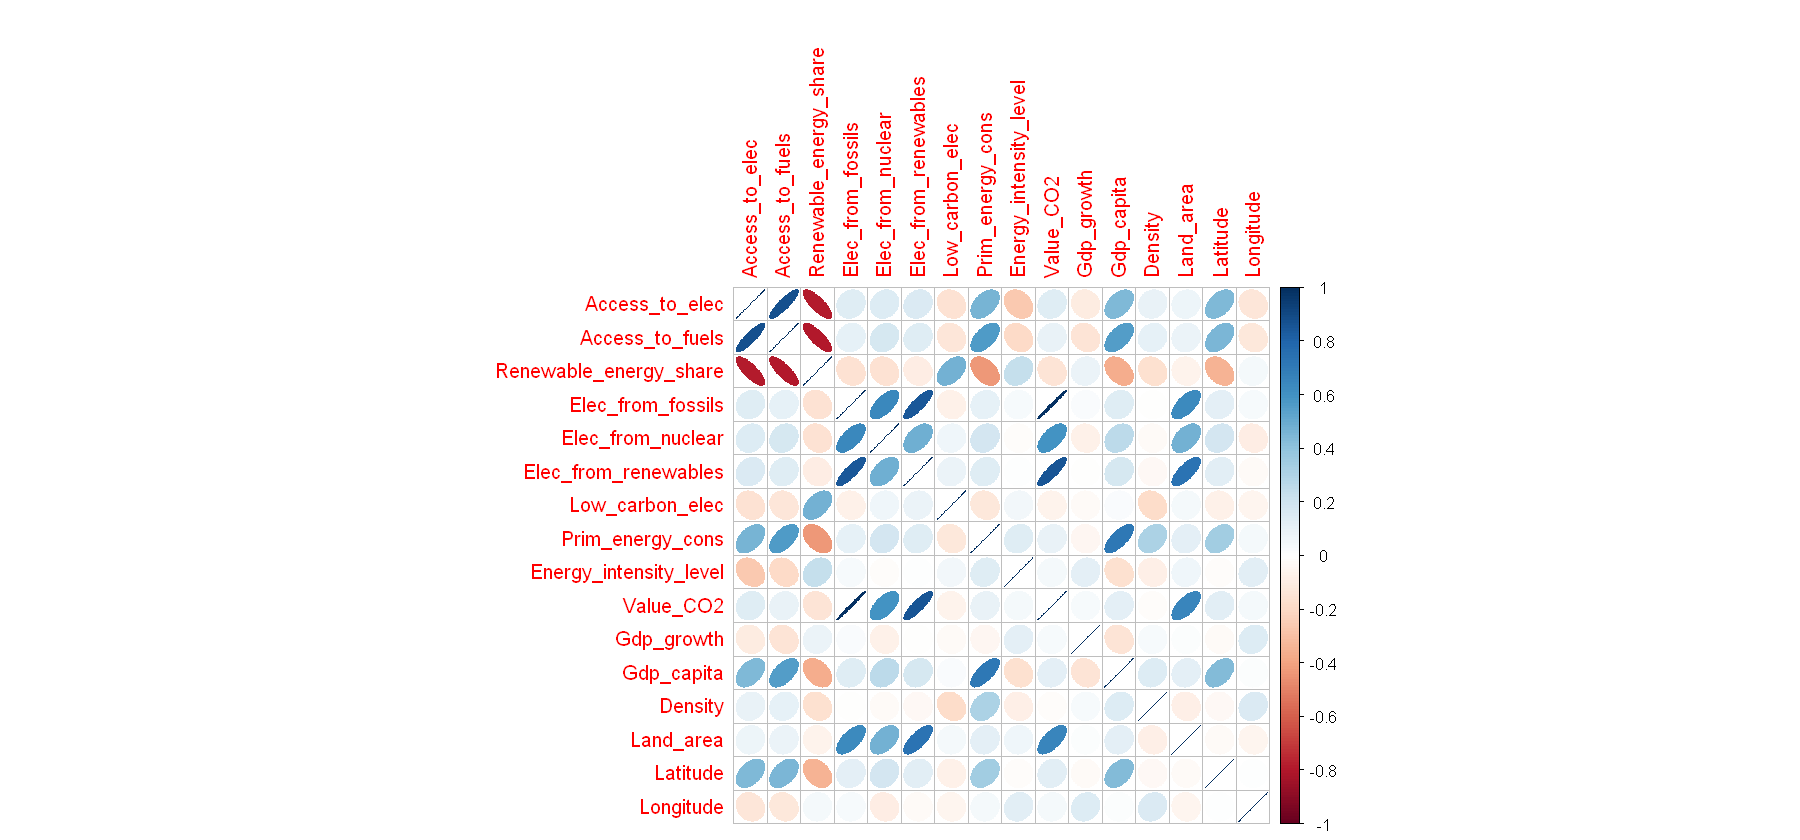

In [19]:
corrplot(cor(data[,3:18]), method="ellipse")

Il semblerait que les corrélations soient similaires mais moins importantes. C'est-à-dire des corrélations de même signe mais moins intenses. 

Ce résultat est satisfaisant, nous ne modifions pas les informations avec nos transformations. 

### Analyse en Composantes Principales

---

On effectue ici une ACP dans un double objectif :
- Exploratoire : l'ACP, peut nous permettre de mieux comprendre et étudier le jeu de données
- Réduction de dimension : l'ACP peut nous permettre de réduire la dimension de notre jeu de données en créant des métavariables portant une part importante de la variabilité du jeu de données

Comme précédemment, on effectue l'ACP sur le jeu de données avec les variables recentrées.

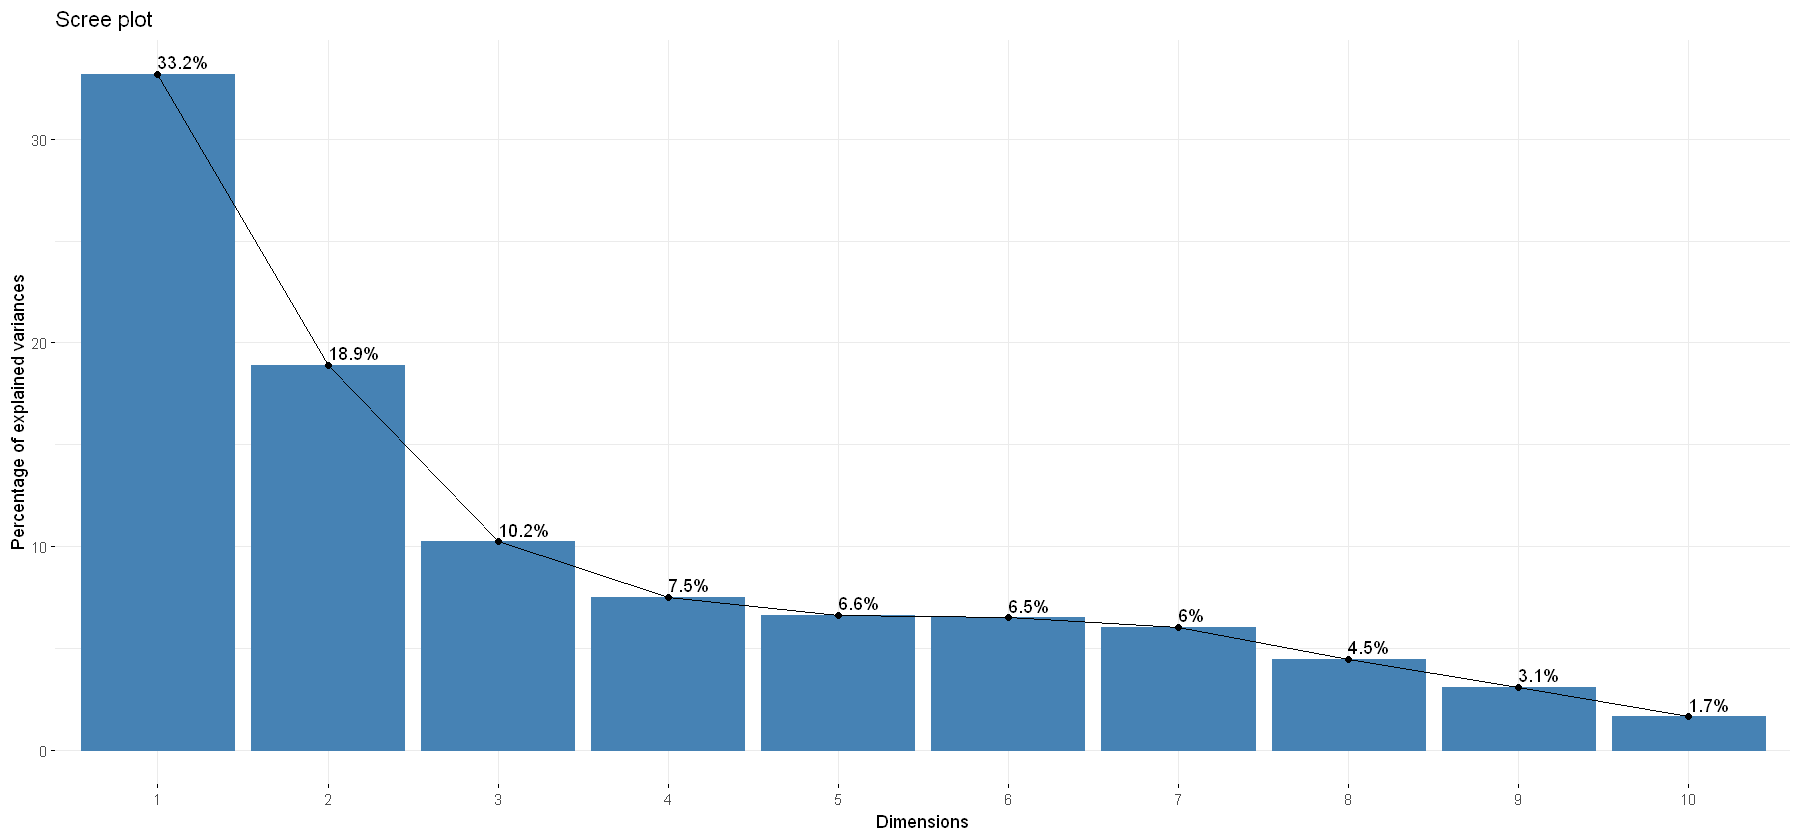

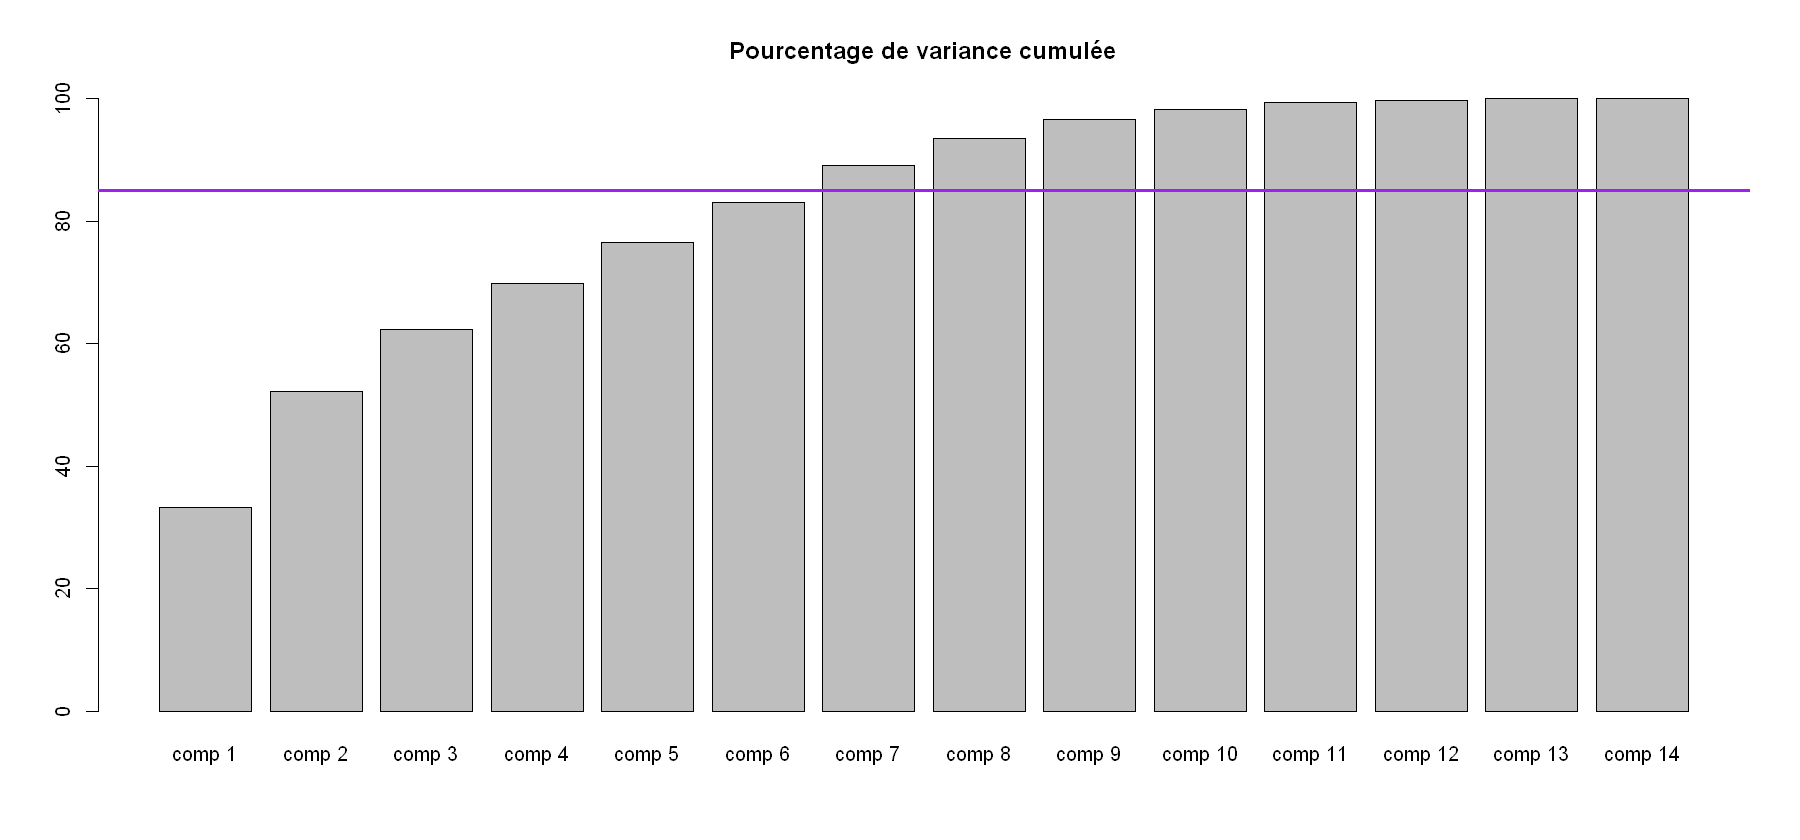

In [20]:
acp <- PCA(data_centre[,3:18], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)

# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

var_cumul = acp$eig[,3]
barplot(var_cumul, main = "Pourcentage de variance cumulée")
abline(h=85, col="purple", lwd = 3)


## On garderai 7 variables explicatives.

On choisit de garder 7 composantes principales afin d'expliquer plus de 85% de la variance du jeux de données. 

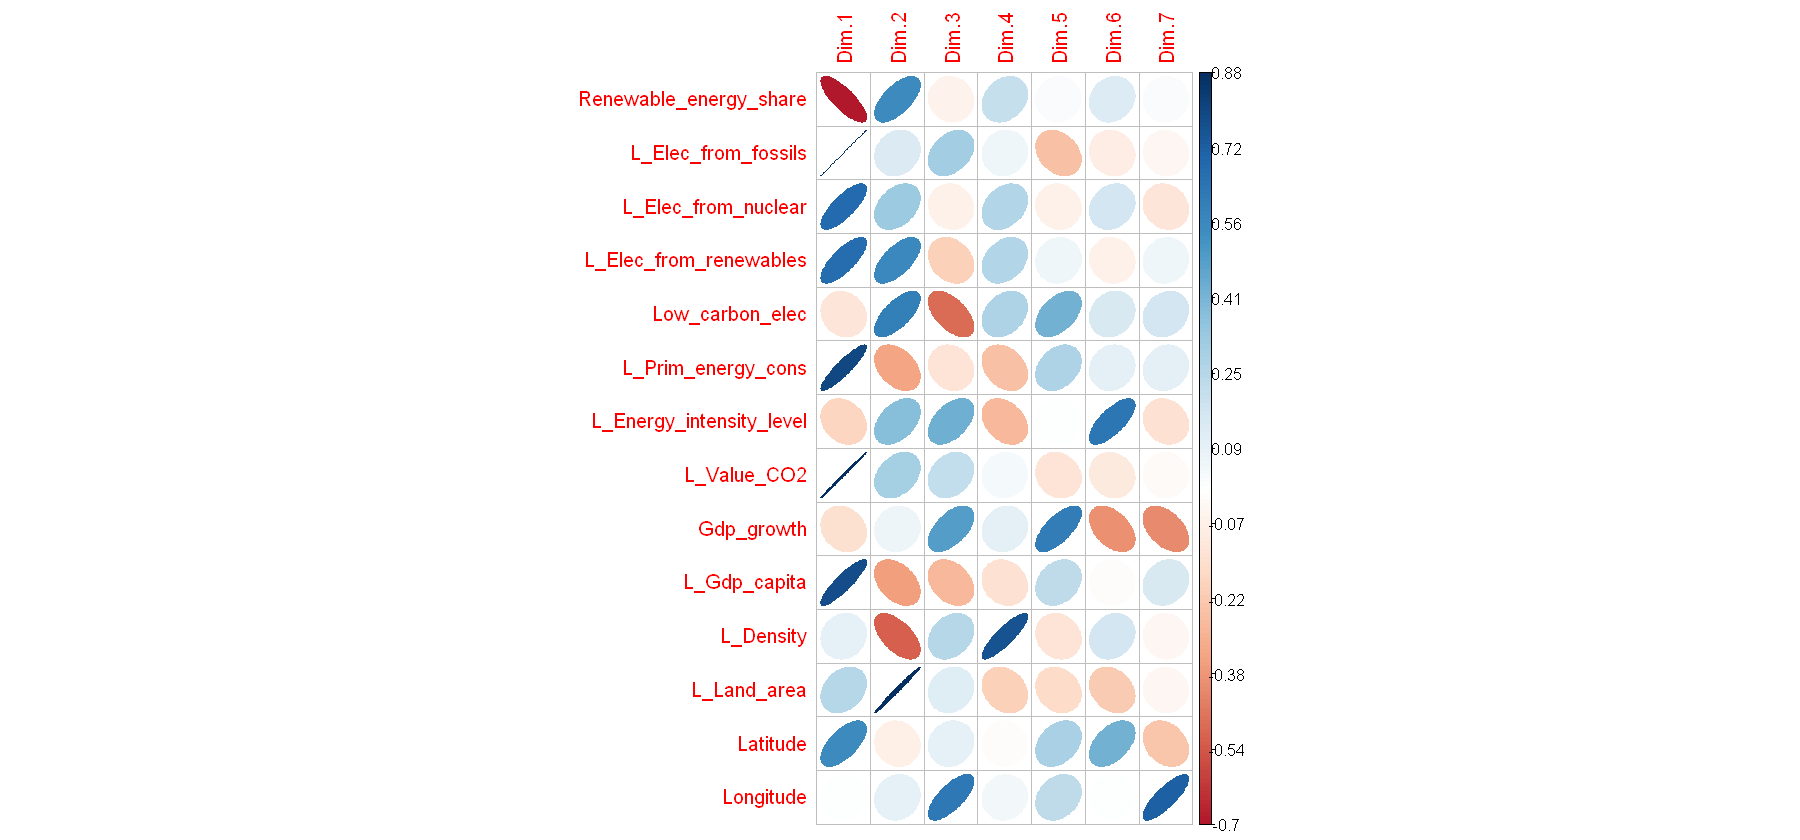

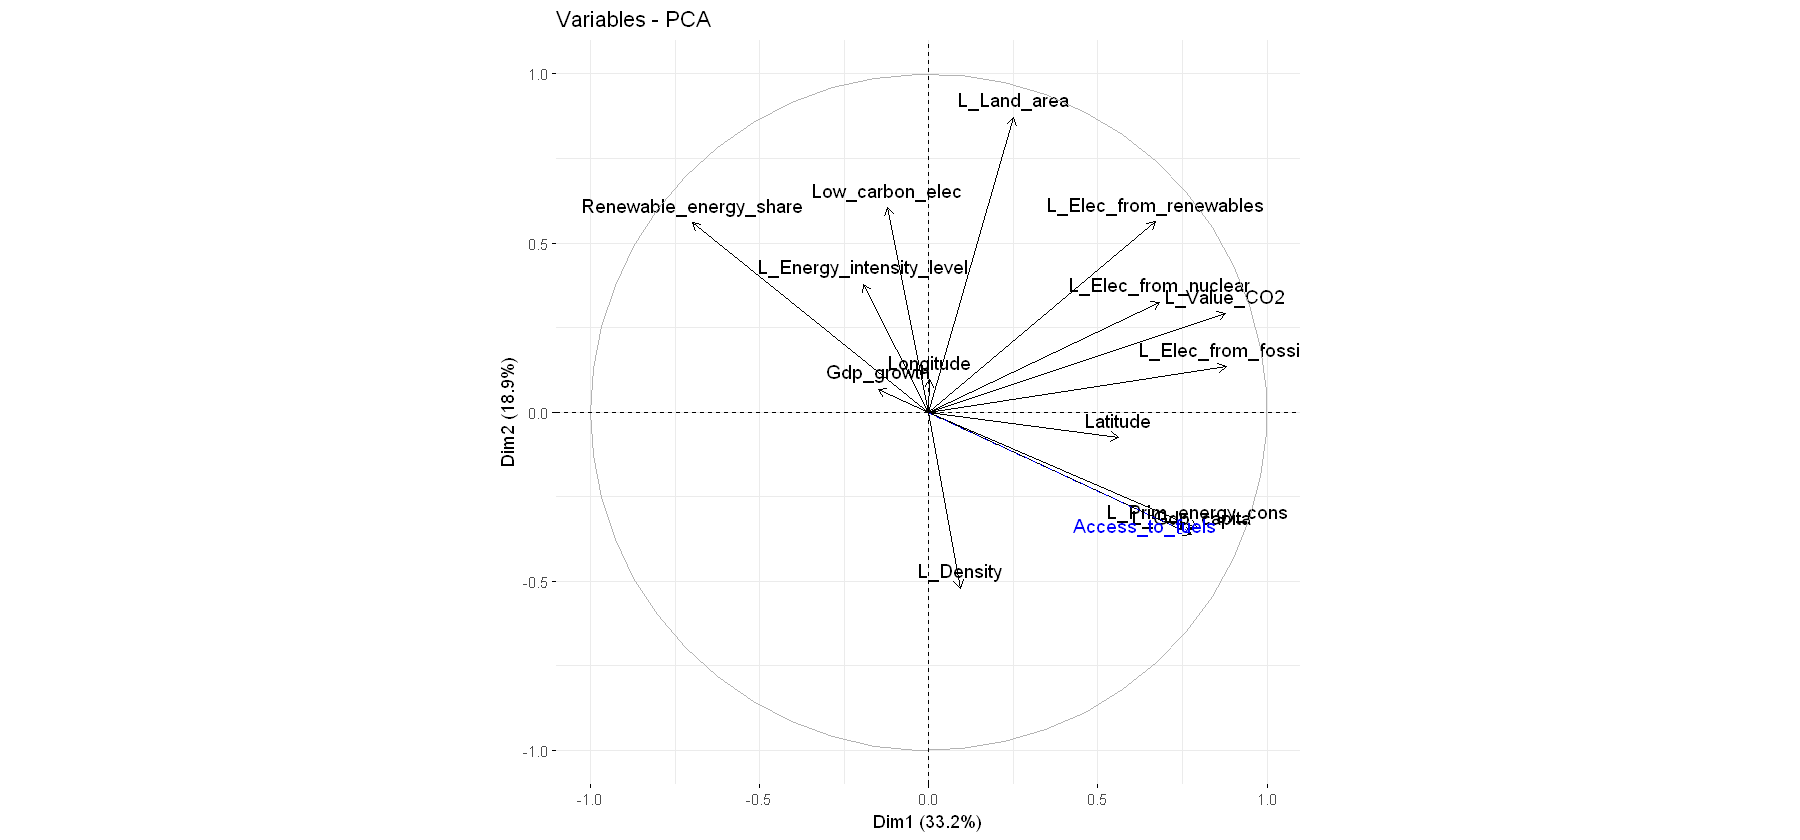

In [21]:
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

fviz_pca_var(acp)

La dimension 1 semble bien expliquer L_value_CO2,Elec_from_fossil, Primary_energy_consumption et gsp_capita. Au contraire elle est très négativement corélée avec Renawable_energy_share.

La dimension 2 explique très bien Land Area. Et est opossée a L_density.

Value CO2 est extrêment bien expliqué par la première dimension et légèrement pas la 2 et la 3. 

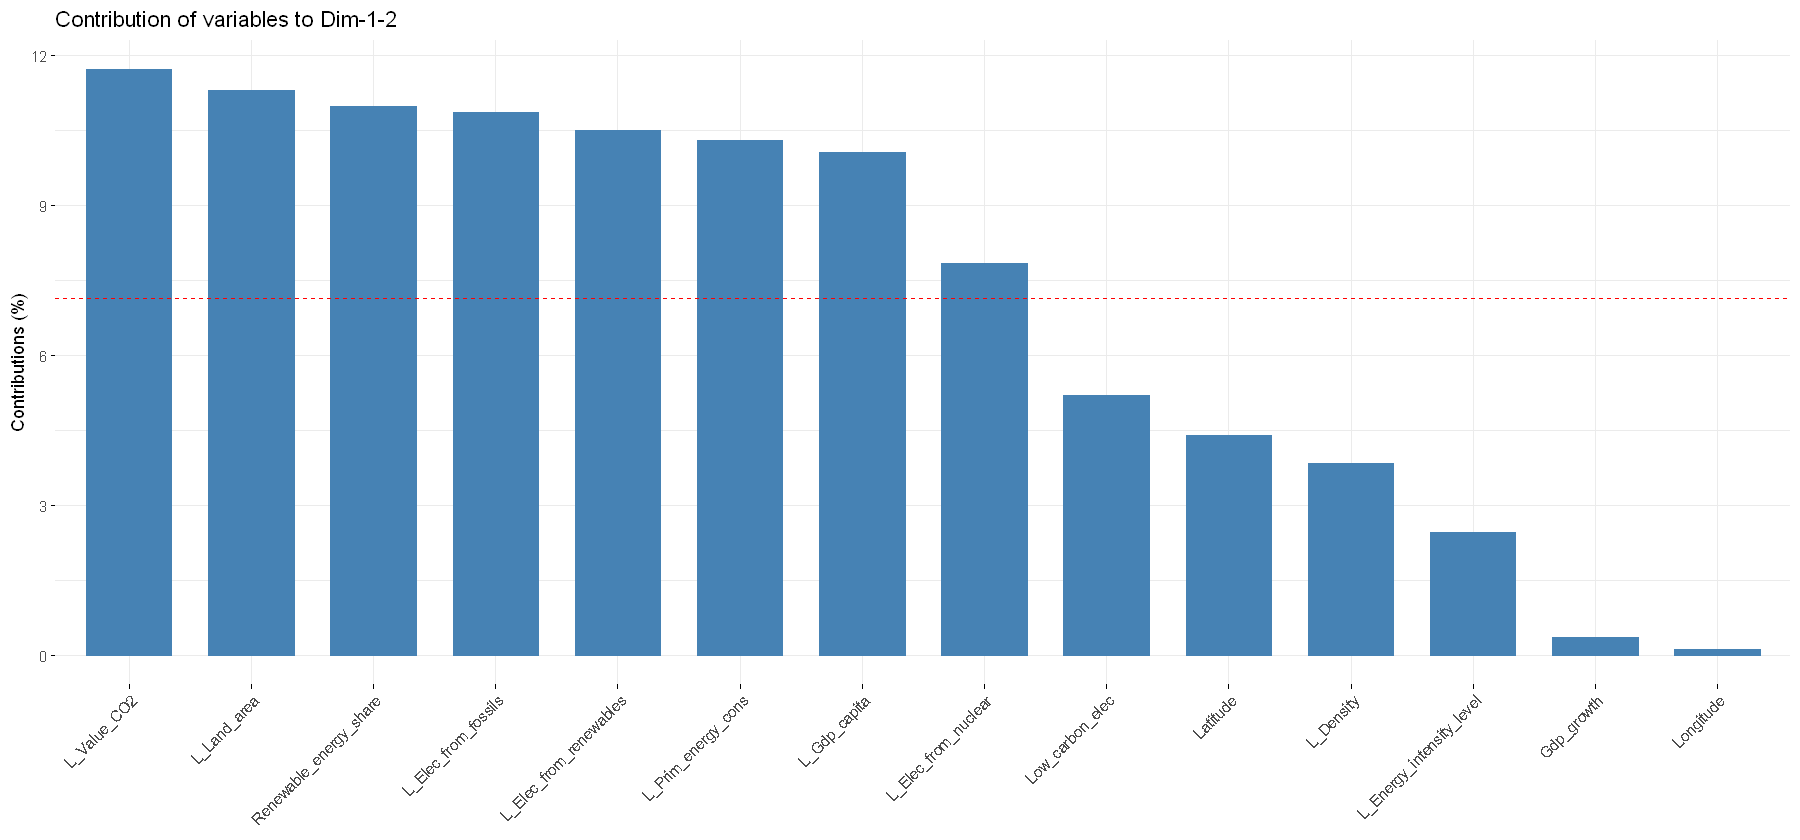

In [22]:
fviz_contrib(acp, choice = "var", axes = c(1,2))

Les deux premières dimensions sont principalement influencées par la valeur du CO2, la land_area ...

[1] "-------- Projection des individus sur les deux premières dimensions --------"

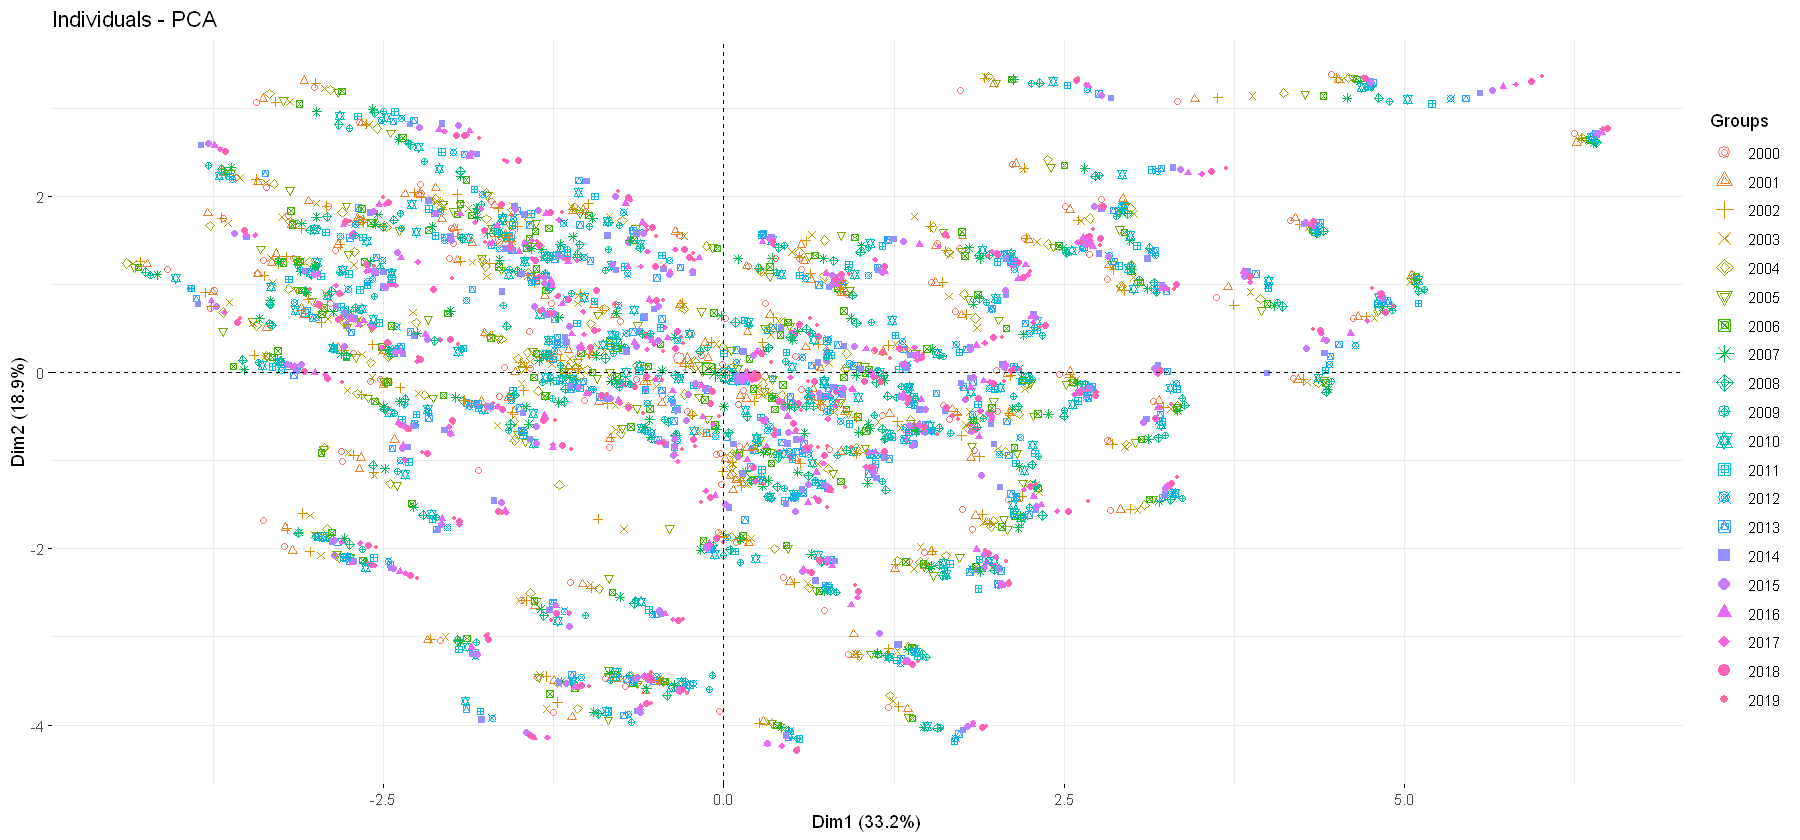

In [23]:
paste('-------- Projection des individus sur les deux premières dimensions --------')
fviz_pca_ind(acp, label="none", habillage=data_centre$Year)#main = "Projection des individus sur les deux premières dimensions")


Il n'y a pas de groupement particulier qui se creent.

Il faudrait tenter d'afficher les differents graphes en fonction des differentes dimensions pour voir si on peut voir quelle composante représente à peu près quoi (comme en AdD en gros).

In [24]:
# ca marche pas lolilol
# data_reduced <- predict(acp)

**8) Visualiser la dépendence de la varibale 'Year' et de la variable à prédire**

[1] "Pourcentage augmentation :"
[1] 37.3818


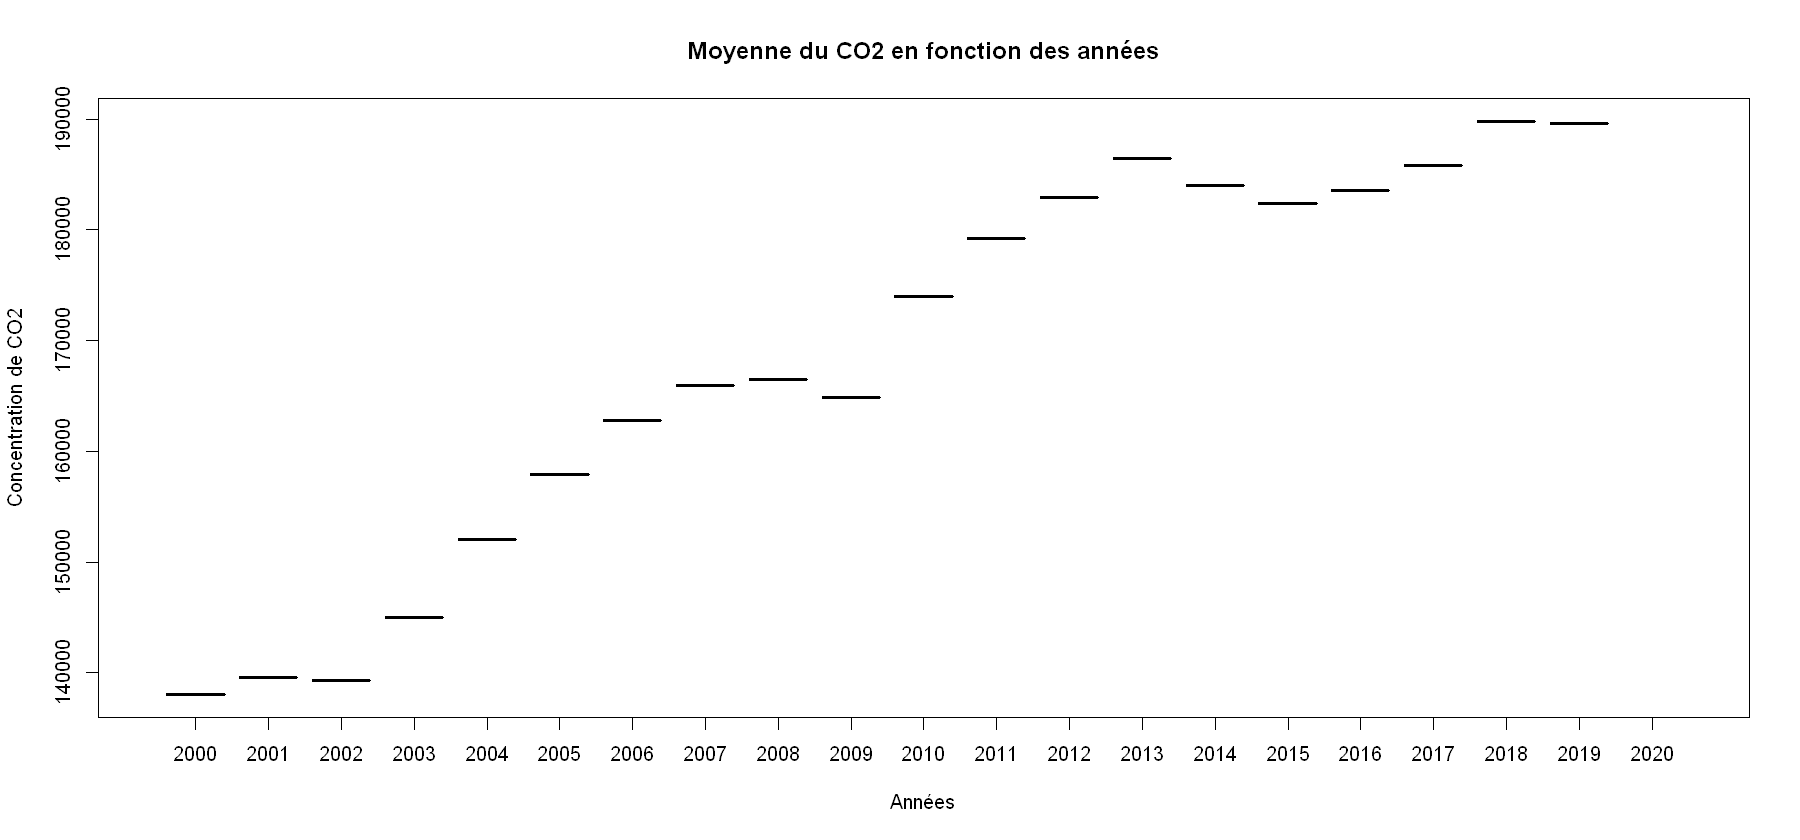

In [32]:
# Variable à prédire : Value-co2-emissions renommée en Value_CO2

Tab = data.frame(data$Year, data$Value_CO2)
colnames(Tab) = c("Year", "Value_CO2") # je récupère les deux variables que je veux utiliser
#str(Tab)                               # data frame : 2868 * 2

Moy_annee = aggregate(Value_CO2 ~ Year, data = Tab, FUN = mean) # moyenne du CO2 selon les années, stockée dans un data frame 

plot(Moy_annee$Value_CO2 ~ Moy_annee$Year, main = "Moyenne du CO2 en fonction des années",
     xlab = "Années", ylab = "Concentration de CO2")

print('Pourcentage augmentation :')
pourc_augm = (Moy_annee$Value_CO2[20] - Moy_annee$Value_CO2[1]) / Moy_annee$Value_CO2[1] *100
print(pourc_augm)

**Interprpétation**

On observe nettement que la moyenne de CO2 augmente très fortement avec les années. Celle-ci passe de 100000 en 2000 à près de 190000 en 2019. 

Entre 2000 et 2020 on observe une obeservation de 37,38%

# Modélisation

---

***Elec_from_fossil***

La variable CO2 étant très corrélée avec la variable Elec_from_fossil, pour un but éducatif, on l'enlèverra pour la suite de l'analyse. 

In [37]:
#data_centre <- data_centre[,-4]

##  Création des échantillons d'apprentissage et de test

In [38]:
#Afficher les résidus 

gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+#xlim(-2000000, 2000000)+ylim(-9000000, 1500000)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [39]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données

n_ind = nrow(data_centre) # nombre de lignes dans les données
n_var = ncol(data_centre) # nombre de colonnes
n_test = ceiling(n_ind * ratio_test) # Taille de l'échantillon test (ceiling = arrondis sup)

print(paste0("Nombre d'individus (total) : " , n_ind))
print(paste0("Nombre de variables : " , n_var))
print(paste0("Taille de l'échantillon de test (20% individus totaux): " , n_test))

indices_test = sample(1:n_ind, n_test) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr = setdiff(1:n_ind, indices_test)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr = data_centre[indices_appr,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test = data_centre[indices_test,] # Echantillon test

CO2_appr = data_centre[indices_appr, 11]
CO2_test = data_centre[indices_test, 11]

paste("Résumé de l'échantillon d'apprentissage : ", dim(data_appr)[1], "individus et ", dim(data_appr)[2], "variables")
paste("Résumé de l'échantillon de test : ", dim(data_test)[1], "individus et ", dim(data_test)[2], "variables")
paste("Résumé de CO2_appr : ",length(CO2_appr), "individus")
paste("Résumé de CO2_test : ", length(CO2_test), "individus")

[1] "Nombre d'individus (total) : 2868"
[1] "Nombre de variables : 17"
[1] "Taille de l'échantillon de test (20% individus totaux): 574"


[1] "Résumé de l'échantillon d'apprentissage :  2294 individus et  17 variables"

[1] "Résumé de l'échantillon de test :  574 individus et  17 variables"

[1] "Résumé de CO2_appr :  2294 individus"

[1] "Résumé de CO2_test :  574 individus"

## Modèles Linéaire

A faire : 
- MSE R2 pour chaque model : balth
- changer moy pays en mode annee 
- step AIC : balth 
- expliciter var conservées sur Lasso : emiri : done 
- bilan sur chaque parti avec MSE R2 
- regarder les TP 
- commentaire / mise en page 

### 1 - Régression linéaire

#### Sans sélection de variable

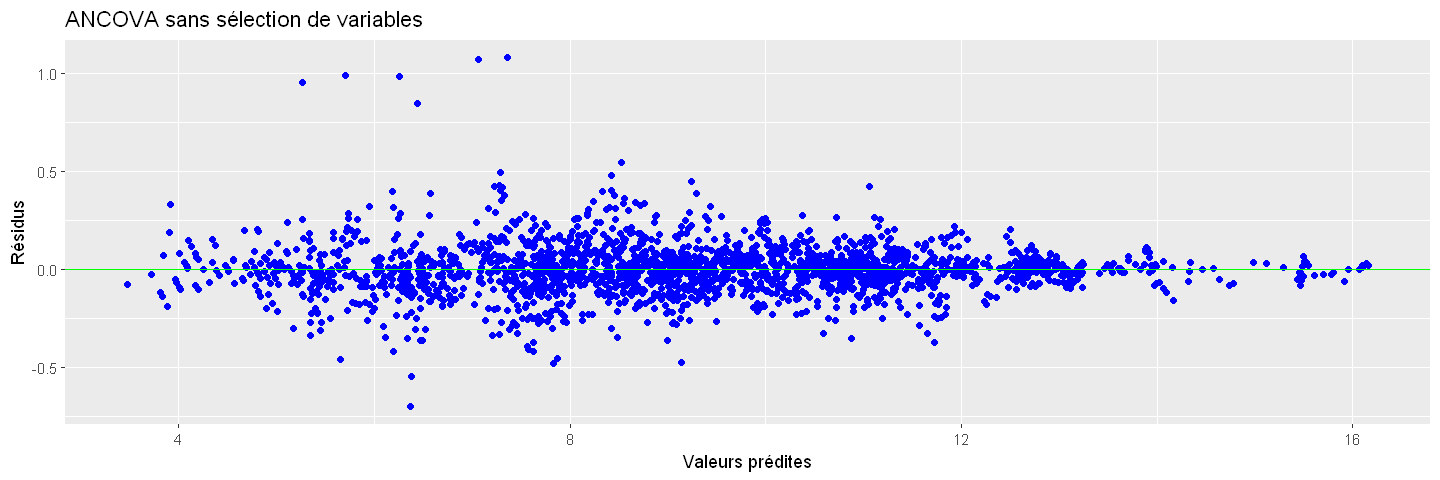

In [40]:
# Estimation du modèle sans interaction

reg.lm = aov(L_Value_CO2 ~ . , data=data_appr) # ANCOVA  car qualitatif + quantitatif

res.lm= reg.lm$residuals                   # Extraction des résidus
fit.lm = reg.lm$fitted.values               # Extraction des valeurs ajustées

#Affichage des résidus 

options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

In [41]:
# coef(reg.lm) il y en a beaucoup

CO2_pred_lm = predict(reg.lm, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lm = mean(res.lm^2) # Moyenne des carrés des résidus
r2_lm = cor(data_test$L_Value_CO2, CO2_pred_lm)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lm)
paste("Coefficient R2 : ", r2_lm)

[1] "MSE pour régression linéaire sans intéraction =  0.0165162044118443"

[1] "Coefficient R2 :  0.997396831826002"

#### Avec les termes quadratiques (long à run)

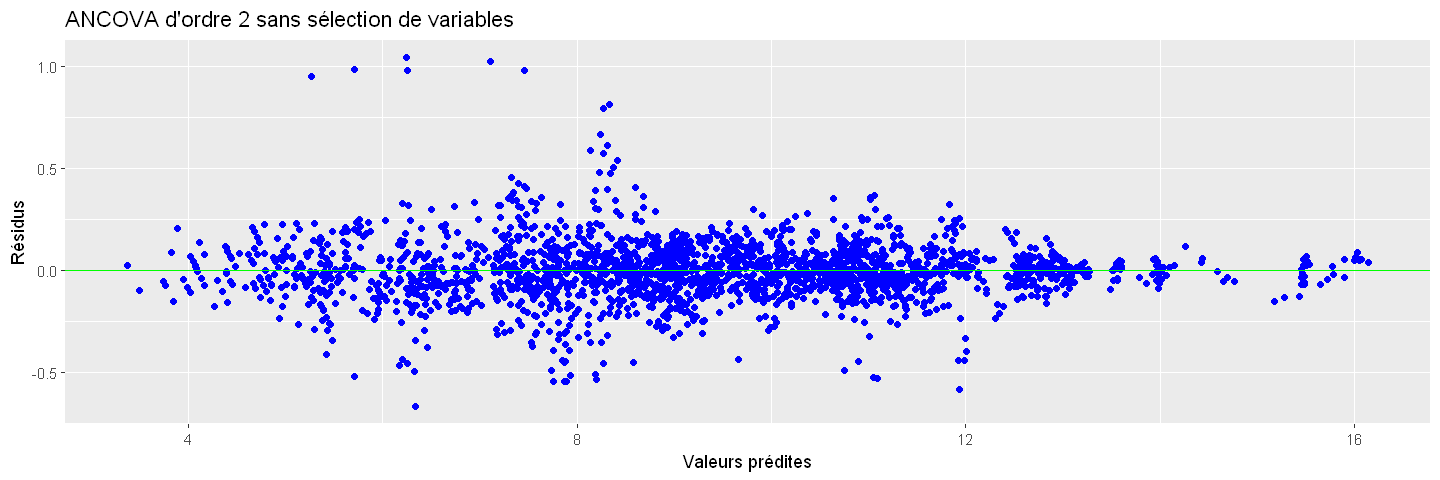

In [212]:
# Estimation du modèle avec intéraction d'ordre 2

reg.lm2 = aov(L_Value_CO2 ~ .^2 , data=data_appr) # ANCOVA  car qualitatif + quantitatif
res.lm2 = reg.lm$residuals                     # Extraction des résidus
fit.lm2 = reg.lm$fitted.values                 # Extraction des valeurs ajustées

gplot.res(fit.lm2,res.lm2,"ANCOVA d'ordre 2 sans sélection de variables")

In [65]:
# coef(reg.lm2)

CO2_pred_lm2 = predict(reg.lm2, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse2 = rmse(, CO2_pred_aov2) # Erreur quadratique moyenne 
r2_2 = cor(data_test$Value_CO2, CO2_pred_lm2)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec intéraction ordre 2 : ", mse2)
paste0("Coefficient R2 : ", r2_2)

ERROR: Error in eval(expr, envir, enclos): objet 'reg.lm2' introuvable


****Selection avec AIC**** : balt

In [171]:
aic <- AIC(reg.lm)

#### Selection de variable avec pénalisation Lasso

In [67]:
library(glmnet)

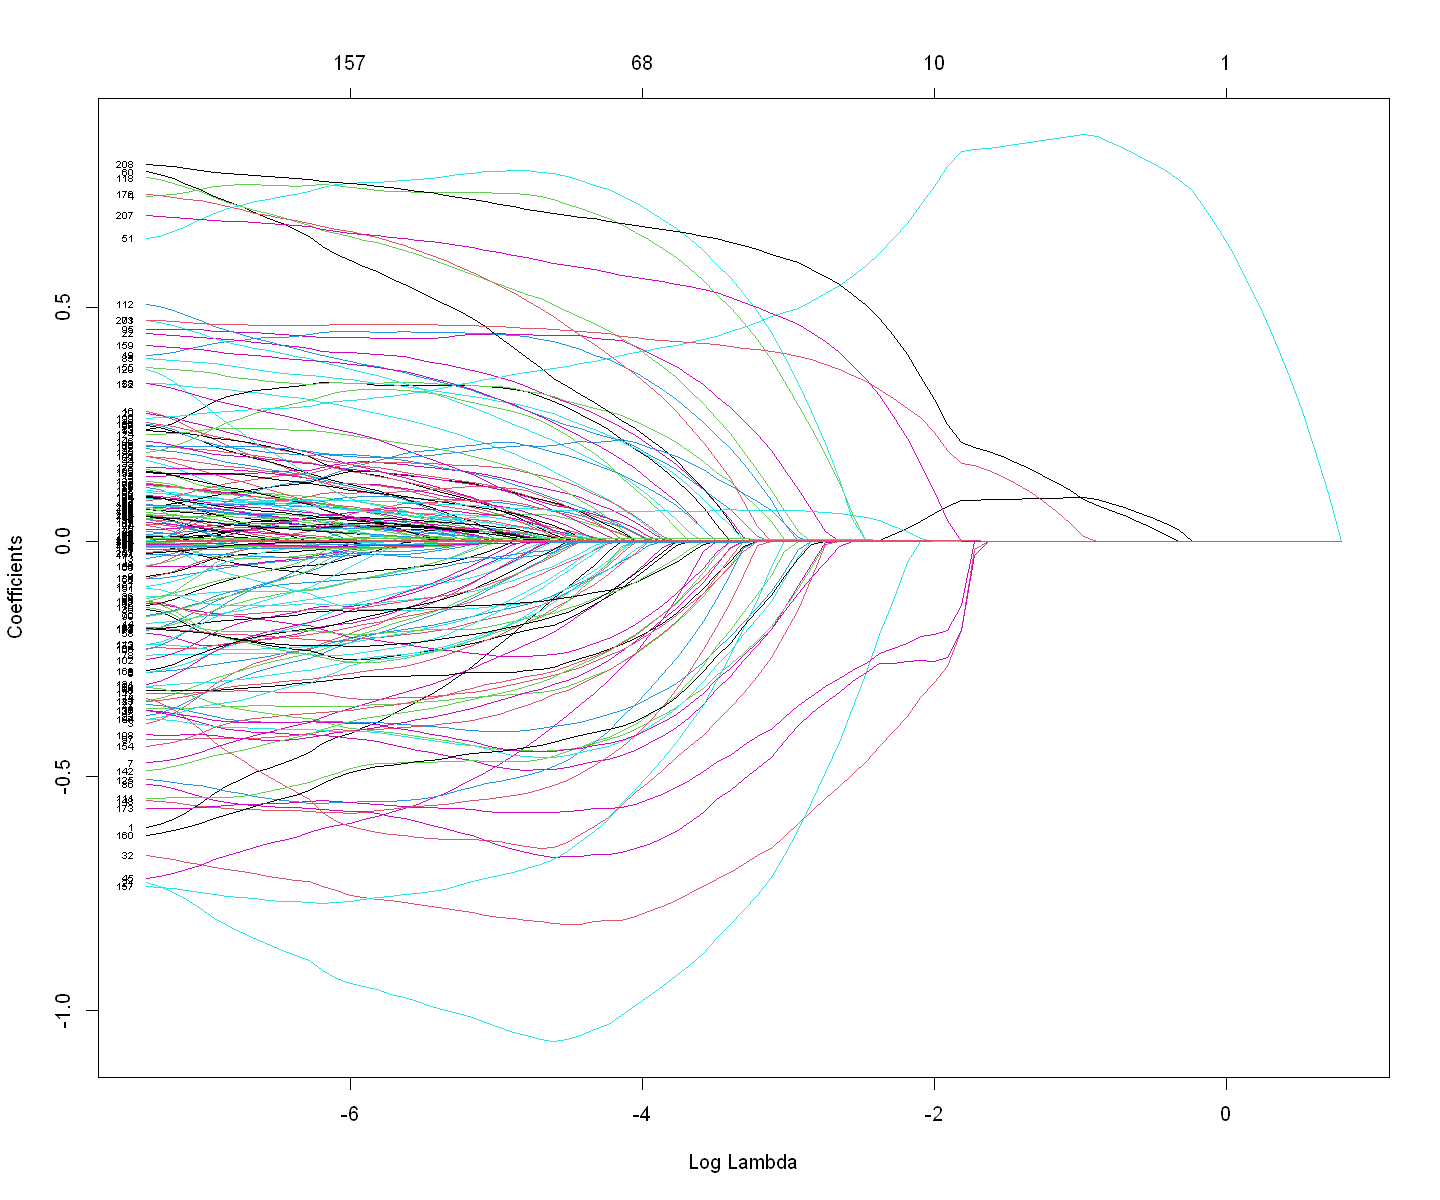

In [68]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.

reg.lasso = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 1)

options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.lasso, xvar = "lambda", label = TRUE)


Cherchons à determiner par validation croisée la meilleur valeur de lambda pour ce model Lasso

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.002"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.001 en log vaut : -6.90775527898214"

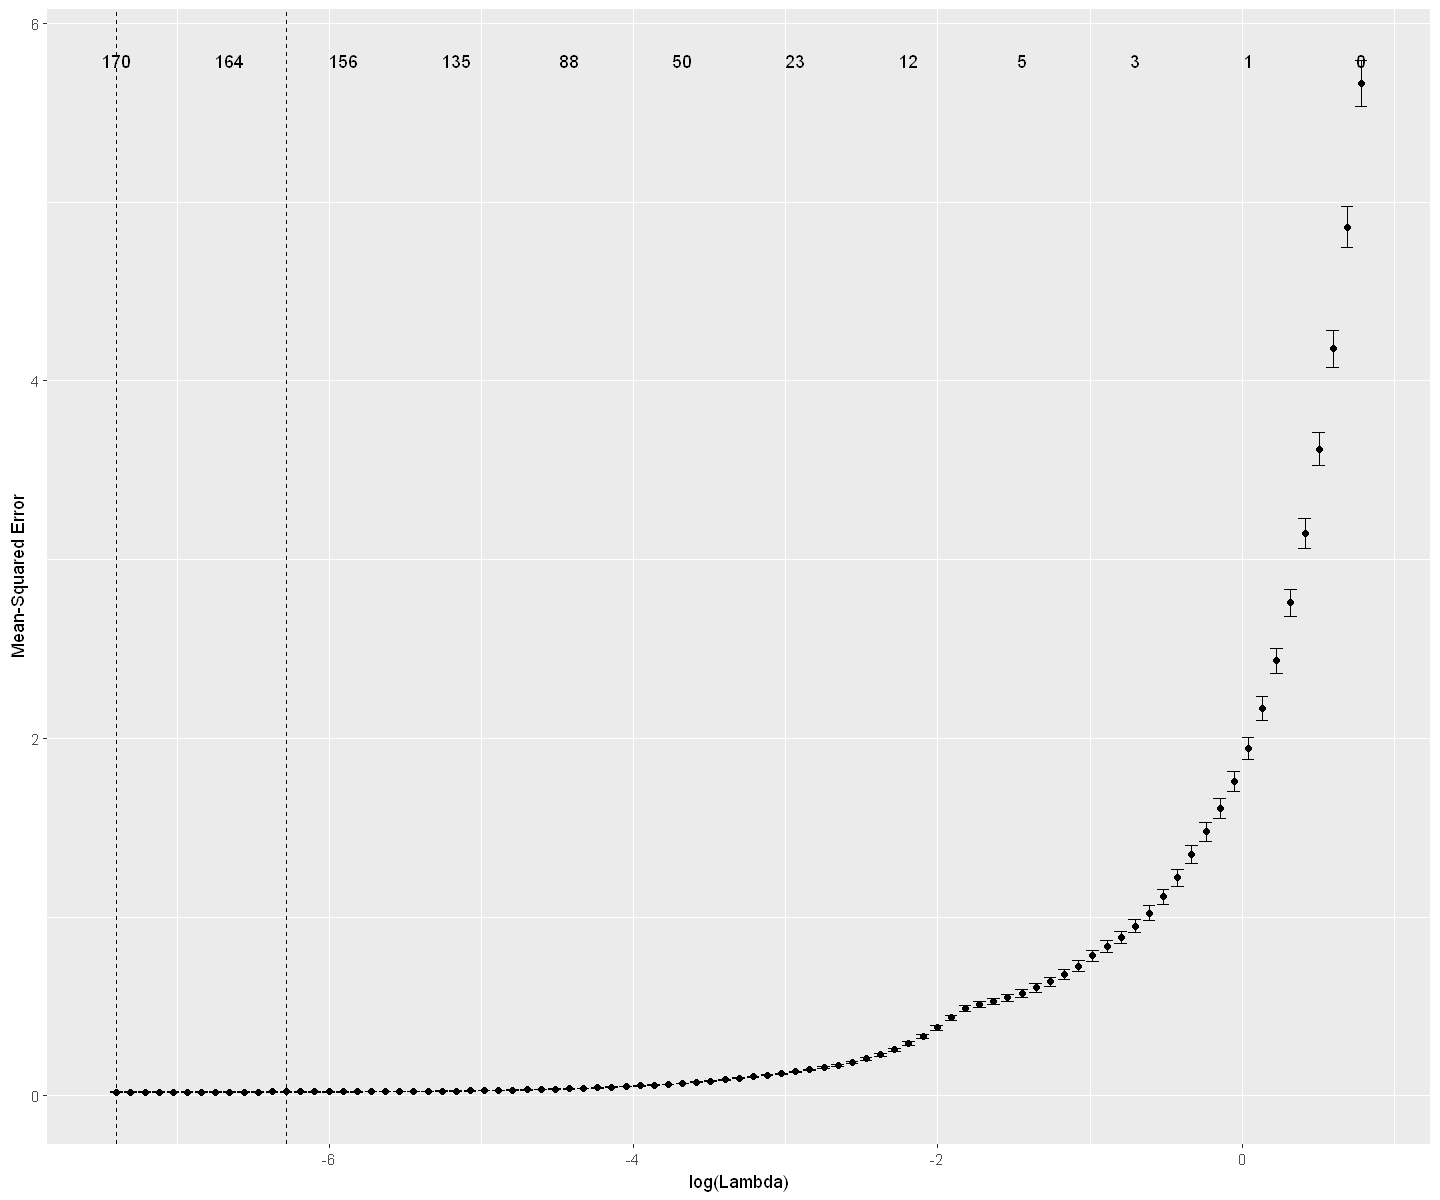

In [69]:
reg.lasso.cv = cv.glmnet(y = data_appr$L_Value_CO2, x = x.mat)
autoplot(reg.lasso.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.min, 3), "en log vaut :",log(round(reg.lasso.cv$lambda.min, 3)))

Cet autoplot = erreur de généralisation (R fait automatiquement de la validation croisée).

Les deux droites verticales :
- Première : la lambda pour la plus petite erreur.
- Seconde : le plus grand lambda pour que l'erreur moyenne de prédiction soit dans l'intervalle de confiance pour lambda_min.

***Interprétation:***
Ici notre objectif est d'avoir un modèle précis donc on gardera lamda_min qui permet de minimiser l'ereur de généralisation.

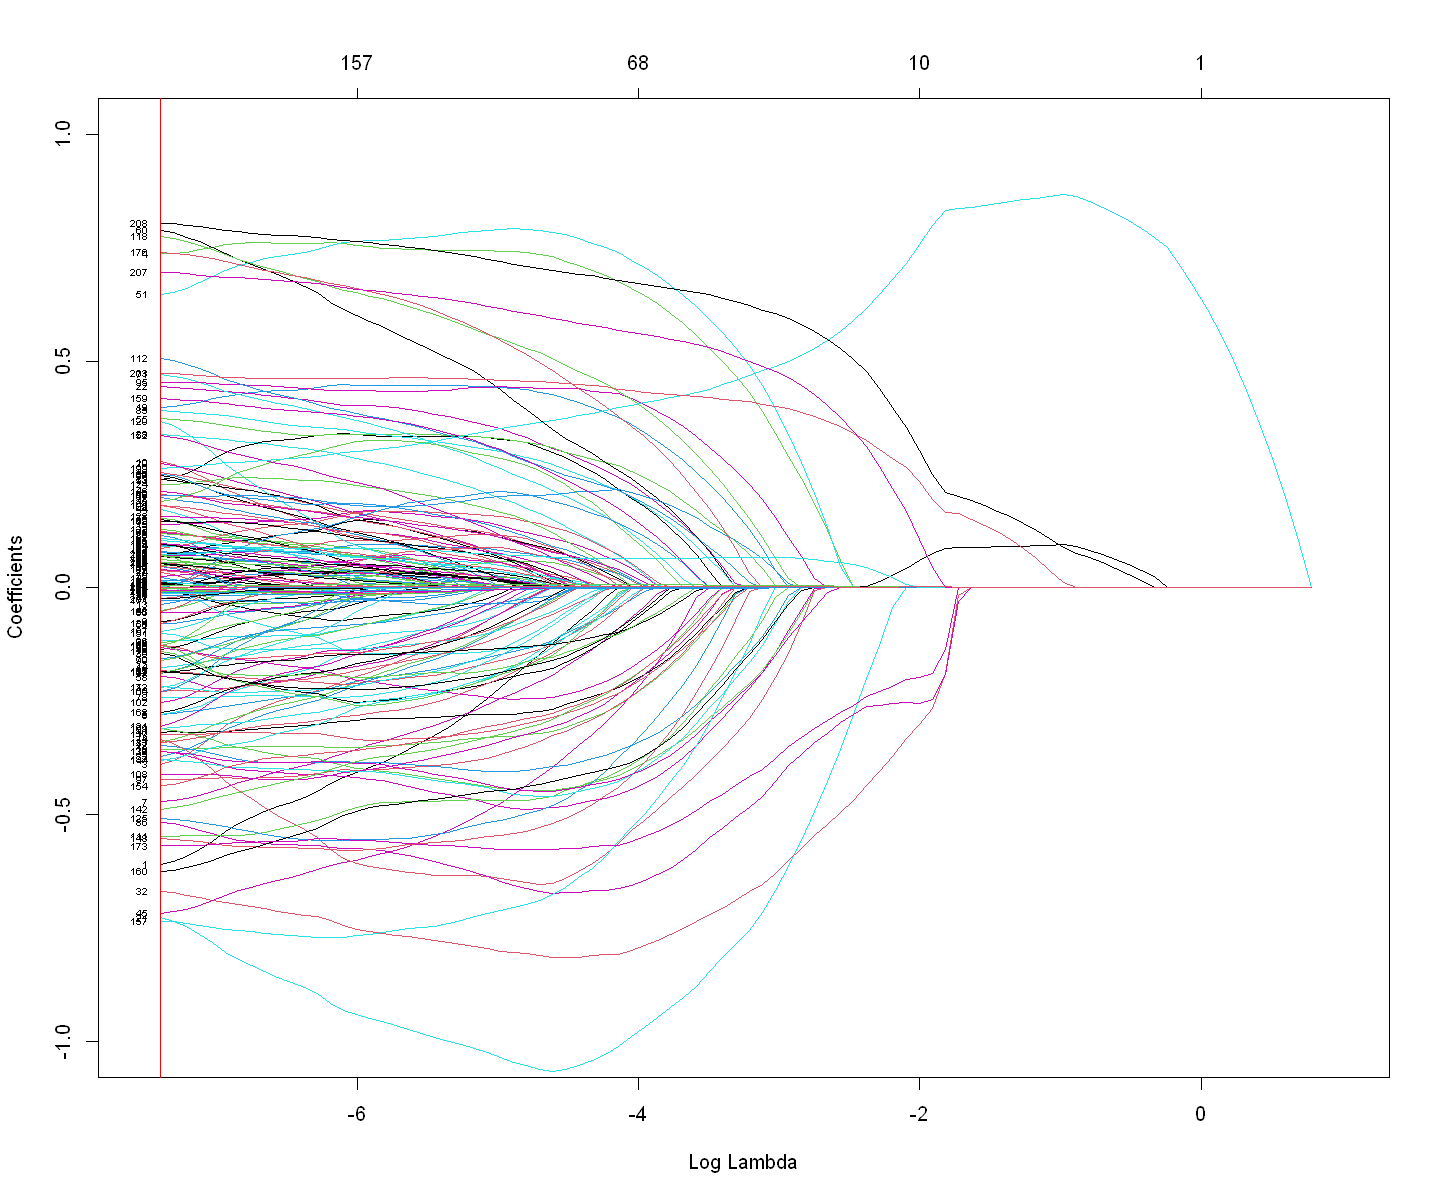

In [72]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7.5,1),ylim=c(-1,1))
abline(v=log(reg.lasso.cv$lambda.min),col="red")  #avec min est ce que y'a pas bcp trop de variables ? 

In [73]:
# Comparaison entre ML sans sélection et ML Lasso (pour Lambda_min et Lambda_se)

# Modèle Linéaire, Lasso, Lambda_min

fit.lasso.min = predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso.min = data_appr$L_Value_CO2 - fit.lasso.min

In [64]:
CO2_pred_lasso_min = predict(reg.lasso.cv, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lasso_min = mean(res.lasso.min^2) # Moyenne des carrés des résidus
r2_lasso_min = cor(data_test$L_Value_CO2, CO2_pred_lasso_min)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lasso_min)
paste("Coefficient R2 : ", r2_lasso_min)

ERROR: Error in predict.glmnet(object$glmnet.fit, newx, s = lambda, ...): The number of variables in newx must be 210


#### Avec pénalisation Ridge

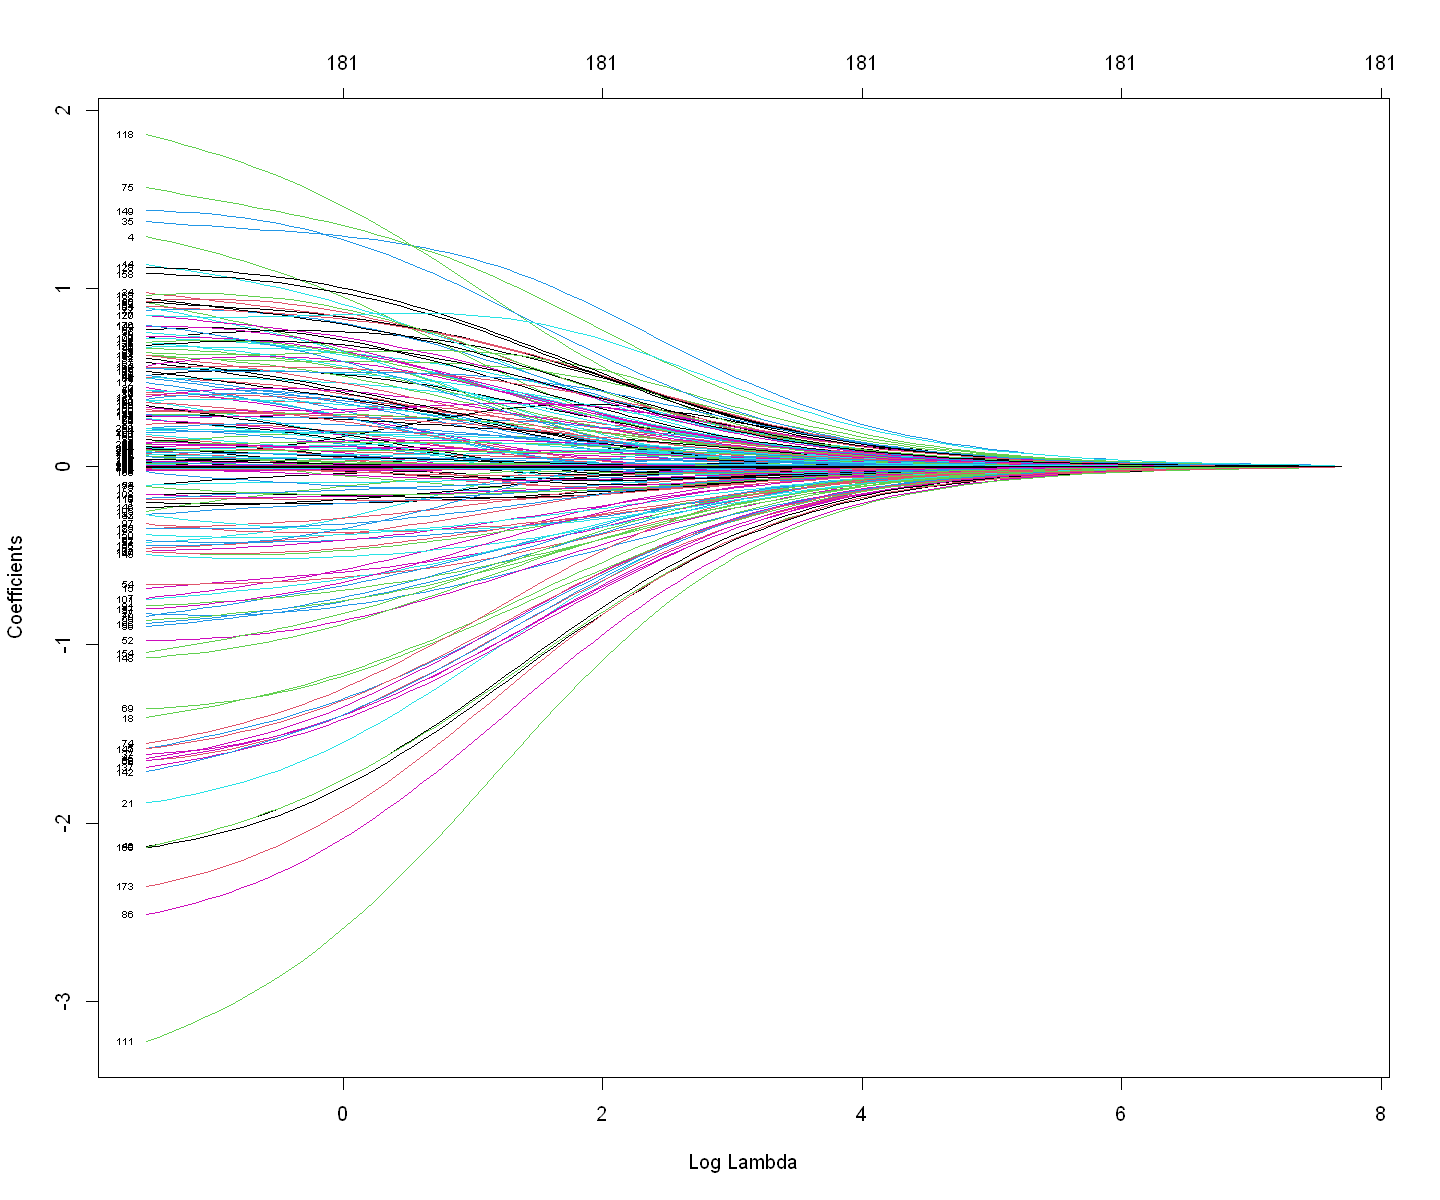

In [86]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.

reg.ridge = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 0)

options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.ridge, xvar = "lambda", label = TRUE)

# legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat))) # si on affiche la légende on voit pas le graph entier...

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.22"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.22"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

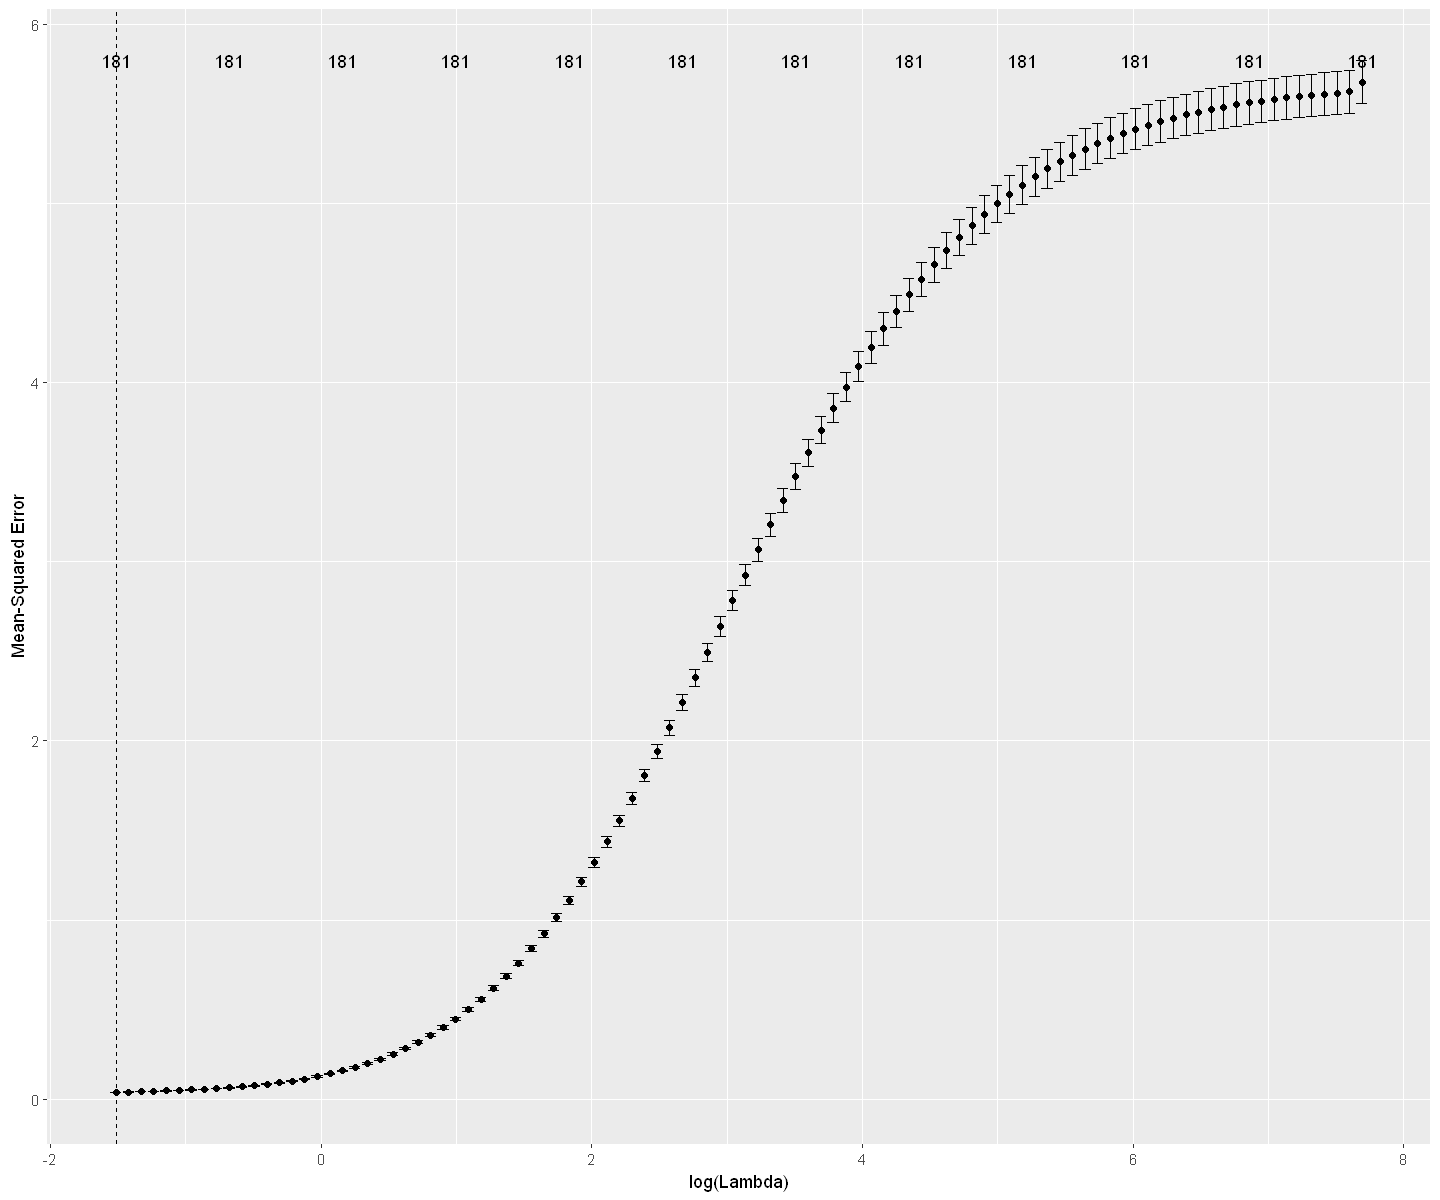

In [87]:
# on cherche à déterminer le meilleur Lambda pour notre model ridge : on va faire de la validation croisée (cross-validation)

reg.ridge.cv = cv.glmnet(y =data_appr$L_Value_CO2, x = x.mat, alpha = 0)

autoplot(reg.ridge.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
#coef(reg.ridge.cv, s="lambda.1se")

[1] "CV estimate of lambda : 0.22"

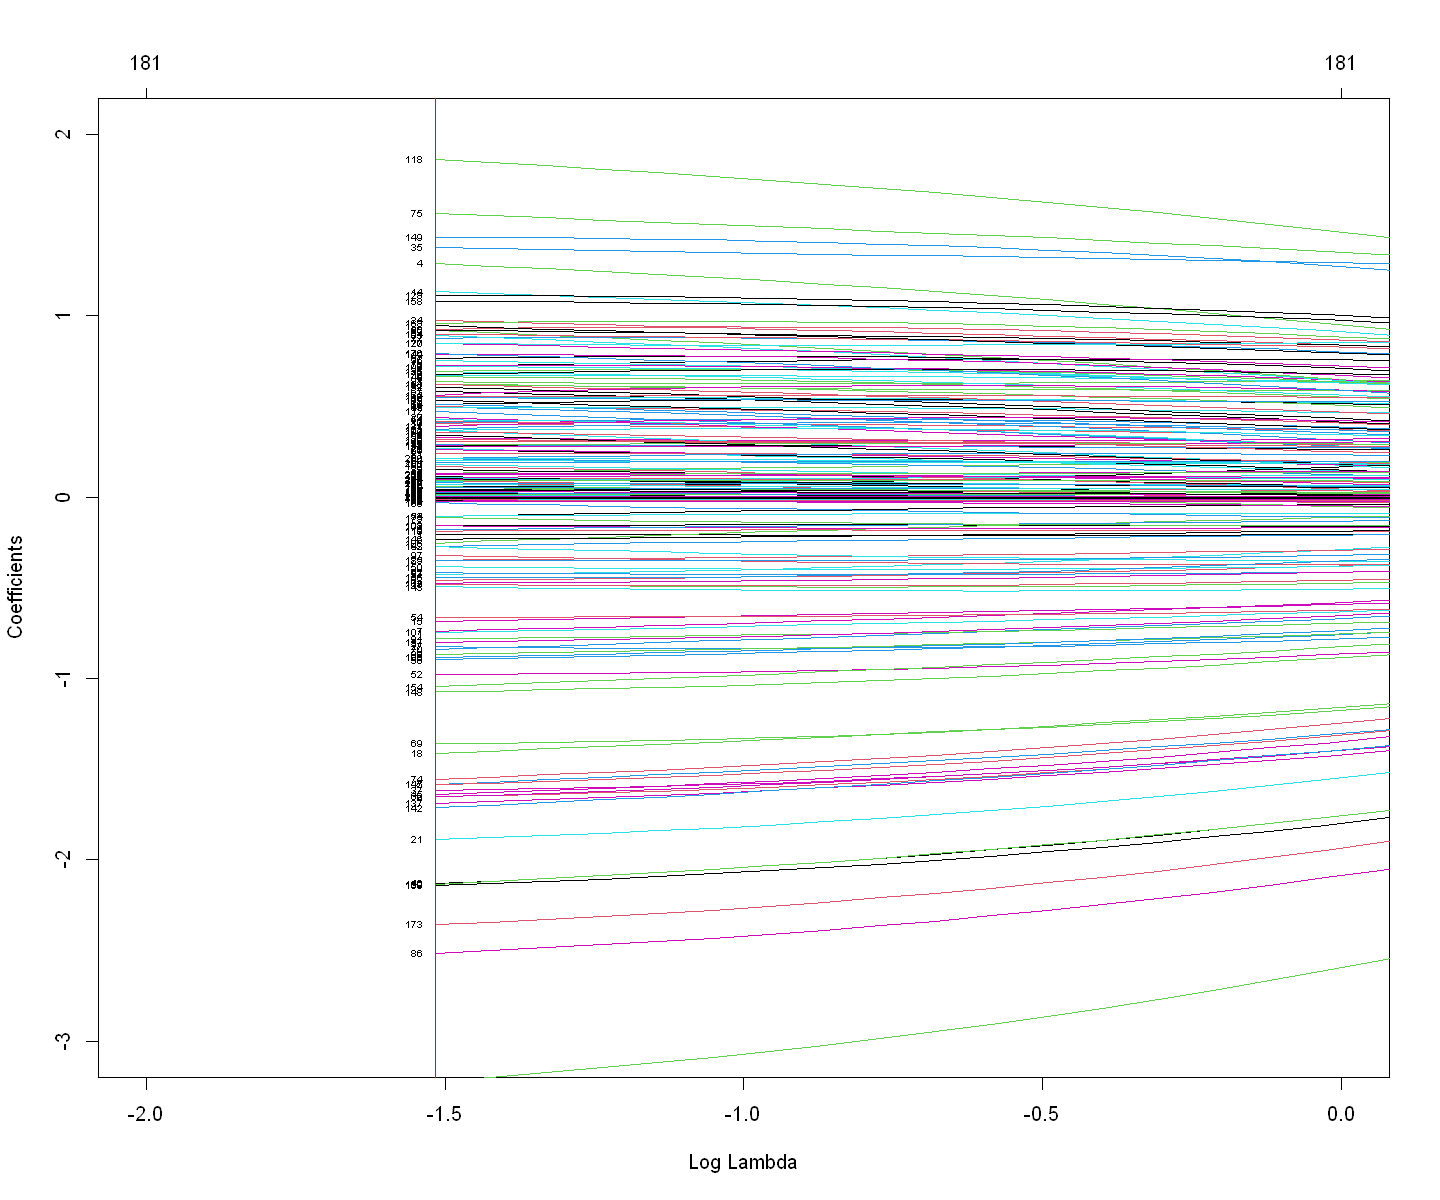

In [88]:
paste("CV estimate of lambda :", round(reg.ridge.cv$lambda.min, 3))

plot(reg.ridge, xvar = "lambda", label = TRUE,xlim=c(-2,0),ylim=c(-3,2))
abline(v=log(reg.ridge.cv$lambda.min),col="red")

In [117]:
# Modèle Linéaire, Ridge, Lambda_min

fit.ridge.min = predict(reg.ridge.cv, s = "lambda.min", newx = x.mat)
res.ridge.min = data_appr$L_Value_CO2 - fit.ridge.min

#### Comparaison des méthodes 

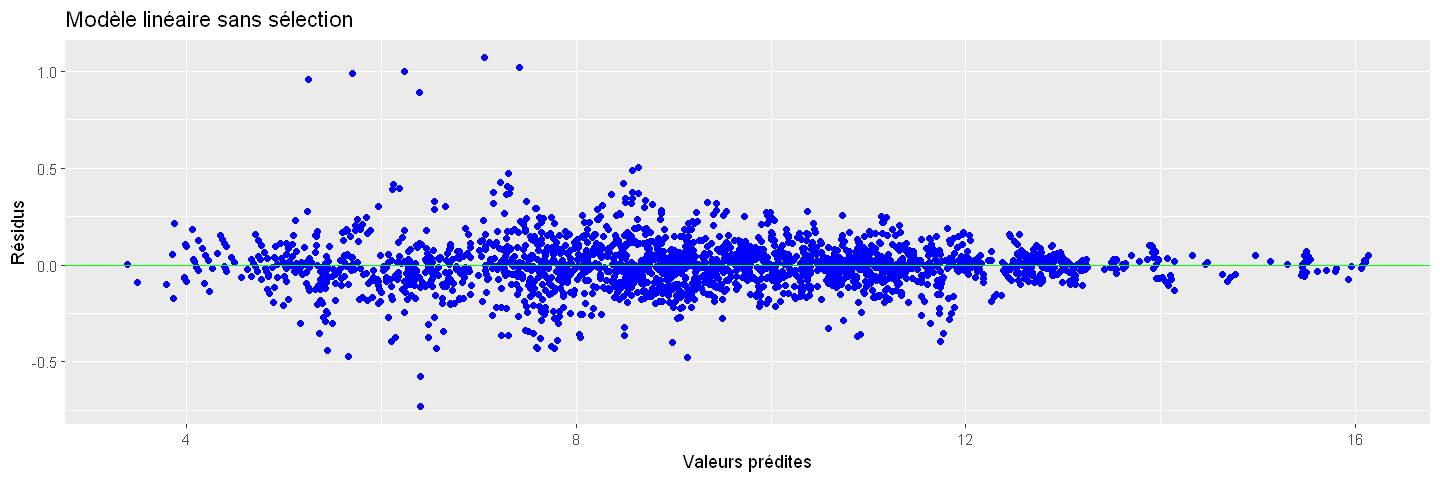

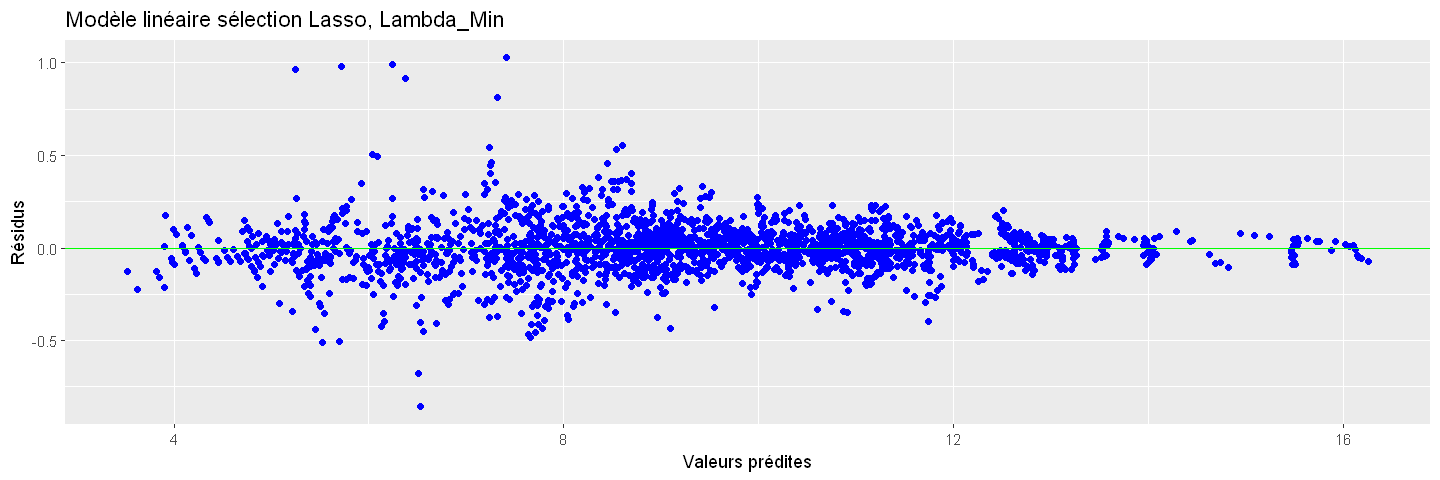

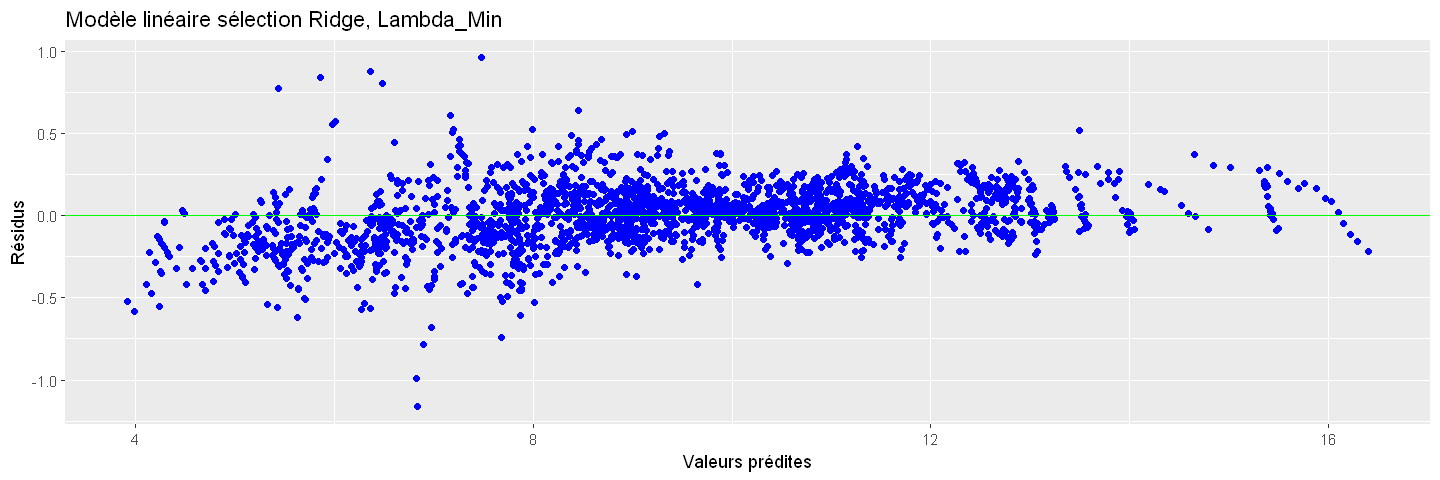

In [118]:
# Affichage
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm,res.lm,"Modèle linéaire sans sélection")
gplot.res(fit.lasso.min, res.lasso.min, "Modèle linéaire sélection Lasso, Lambda_Min")
gplot.res(fit.ridge.min, res.ridge.min, "Modèle linéaire sélection Ridge, Lambda_Min")

***Interpretation***

La méthode de selection de pénalisation de Ridge prenant en compte Lambda_min semble être la meilleur des trois et permet de réduire au maximum la variance des résidus. 

***Bilan:*** afficher toutes les mSE et R2

Nous garderons pour cette partir le modèle avec pénalisation de Ridge.

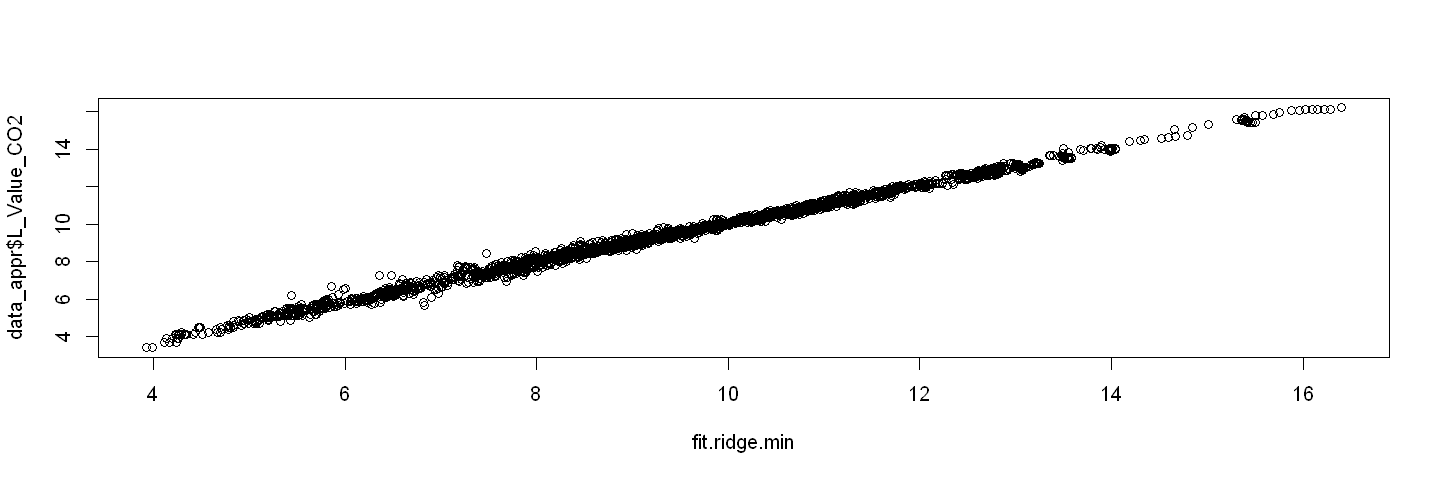

In [120]:
plot(fit.ridge.min,data_appr$L_Value_CO2)

### 2 - Analyse discriminante

### SVR

In [121]:
library('MASS')
library('class') # pour kNN
library('caret')
library('e1071')
library(glmnet)
library(ROCR)

#### Choix des paramètres 

In [122]:
#Choix des meilleurs paramètres avec tune
svm.reg.tune = tune.svm(L_Value_CO2 ~ ., data = data_appr, cost = c(7), 
    gamma = seq(0.02, 0.1, by = 0.02))

On retiendra les paramètres : gamma = 0.06 et cost = 7

In [123]:
svm.reg = svm(L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

#### Affichage des résidus 

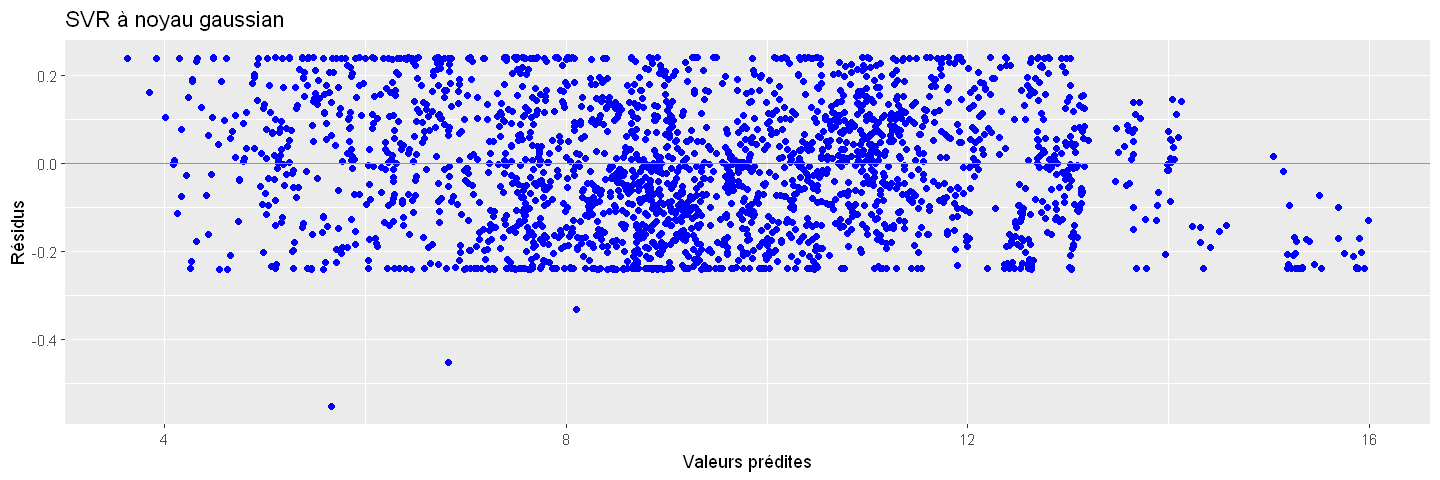

In [126]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-data_appr[,"L_Value_CO2"]

gplot.res(fit.svmr,res.svmr,"SVR à noyau gaussian")

### Prévision de l'échantillon test 

#### Erreur de régression

In [127]:
pred.svmr=predict(svm.reg,newdata=data_test)
sum((pred.svmr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)

[1] 0.03019058

#### Erreur de classification

In [161]:
table(pred.svmr>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   336    5
  TRUE      3  228

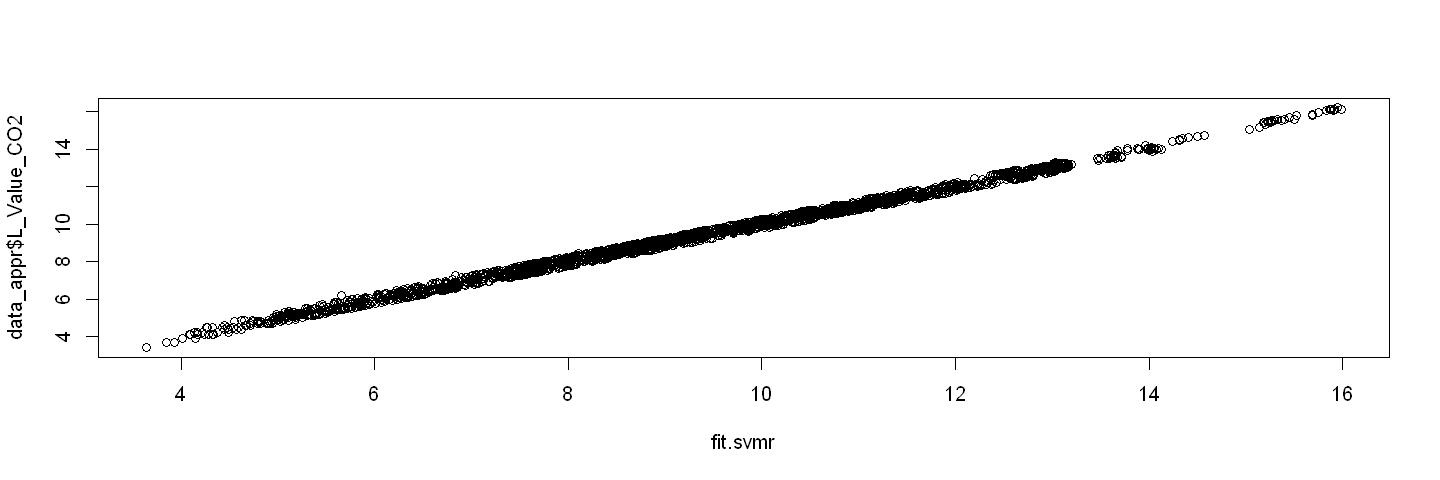

In [162]:
plot(fit.svmr,data_appr$L_Value_CO2)

## Arbre optimal

In [62]:
library('rpart') 
library(rpart.plot)
library(partykit)

Warning message:
"le package 'rpart.plot' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'partykit' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Warning message:
"le package 'libcoin' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : mvtnorm

Warning message:
"le package 'mvtnorm' a été compilé avec la version R 4.3.3"


#### Reherche de la valeur de cp pour minimiser l'erreur et construction de l'arbre

In [181]:
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=0.001))

In [189]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

[1] 0.001019854

In [182]:
xmat<-xpred.rpart(tree.reg,xval=10) 
CVerr<-apply((xmat-data_appr[,"L_Value_CO2"])^2,2,sum)
print('Valeur de cp : '); as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

[1] "Valeur de cp : "


[1] 0.001019854

#### Affichage de l'arbre

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


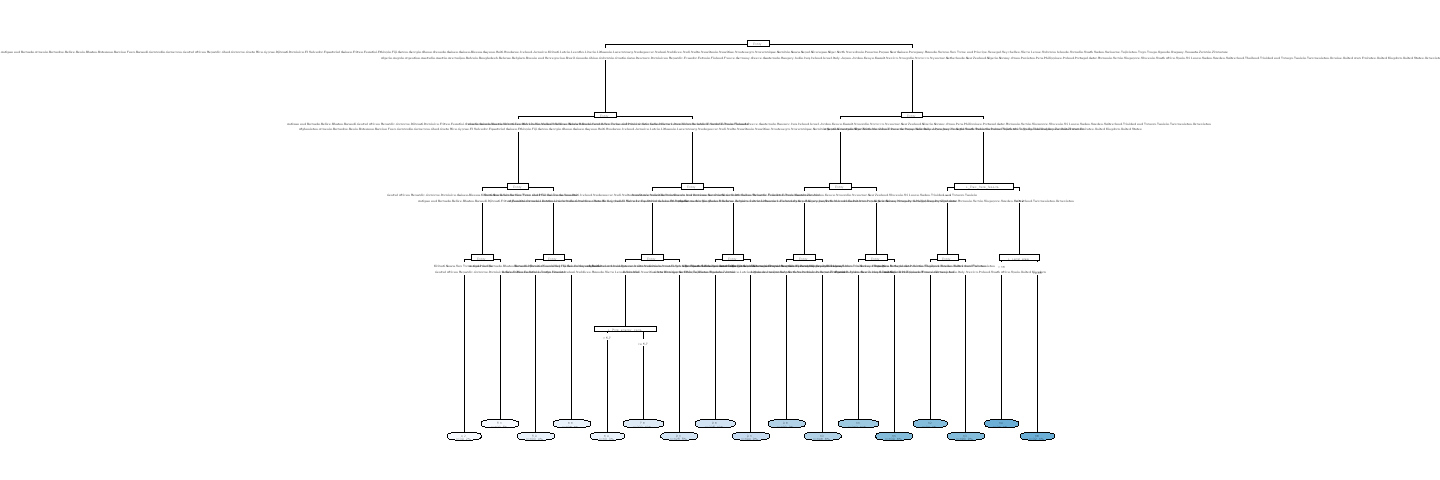

In [198]:
rpart.plot(tree.reg,type=5,extra=101)

***Commentaire :*** 
La variable L_Elec_from_fossil est la variable contribuant le plus à l'interprétation. 

#### Affichage des résidus 

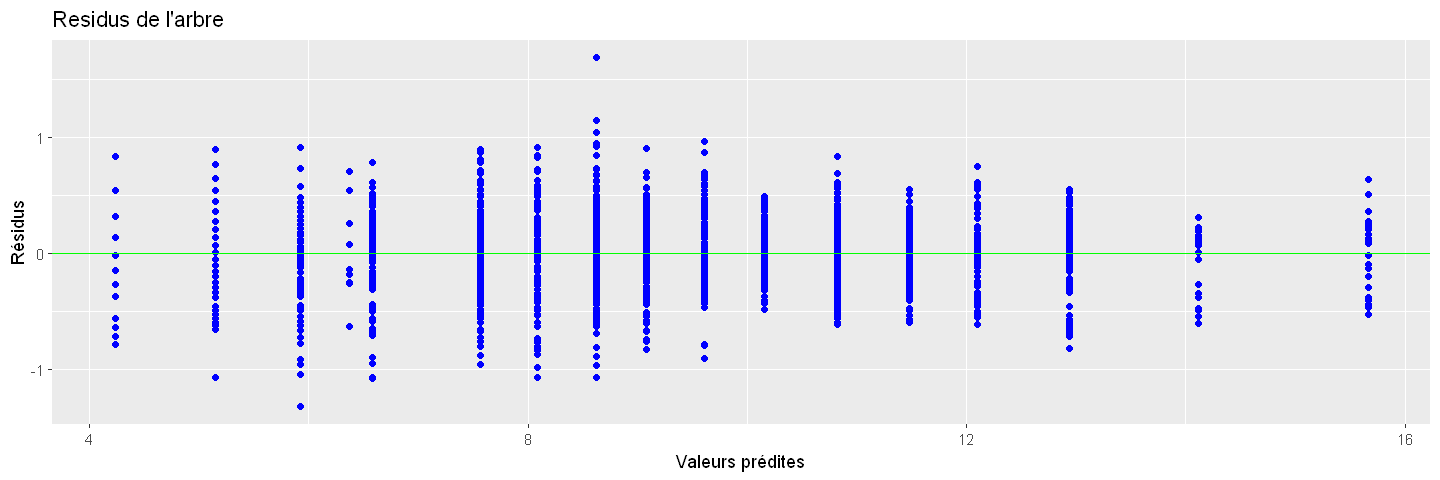

In [199]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-data_appr[,"L_Value_CO2"]
gplot.res(fit.tree,res.tree,"Residus de l'arbre")

***Interprétation:***

Les résidus de l'arbre sont inégalements centrés et de variance inégale. Le résultat n'est pas parfaitement satisfaisant. 

### Prévision de l'échantillon test

##### Erreur de regression 

In [137]:
pred.treer=predict(tree.reg,newdata=data_test)
sum((pred.treer-data_test[,"L_Value_CO2"])^2)/nrow(data_test)

[1] 0.1218401

#### Erreur de classification

In [151]:
confusionMatrix(as.factor(pred.treer>10),as.factor(data_test[,"L_Value_CO2"]>10))$table

          Reference
Prediction FALSE TRUE
     FALSE   330    4
     TRUE      9  229

## Forêt aléatoire

In [142]:
library(randomForest)
library(ggRandomForests)

Warning message:
"le package 'randomForest' a été compilé avec la version R 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin


Warning message:
"le package 'ggRandomForests' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : randomForestSRC

Warning message:
"le package 'randomForestSRC' a été compilé avec la version R 4.3.3"

 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attachement du package : 'randomForestSRC'


Les objets suivants sont masqués depuis 'package:e1071':

    impute, tune




In [201]:
fa.reg=randomForest(L_Value_CO2 ~., data=data_appr[,-1],xtest=data_test[,-c(1,12)],ytest=data_test[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 
print(fa.reg)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.03163     0.55 |  0.02779     0.50 |
 100 |  0.02853     0.50 |   0.0265     0.48 |
 150 |  0.02773     0.48 |  0.02676     0.49 |
 200 |  0.02689     0.47 |  0.02742     0.50 |
 250 |  0.02662     0.46 |  0.02689     0.49 |
 300 |  0.02609     0.46 |  0.02714     0.49 |
 350 |  0.02587     0.45 |  0.02735     0.50 |
 400 |  0.02574     0.45 |  0.02737     0.50 |
 450 |  0.02604     0.45 |   0.0277     0.50 |
 500 |  0.02609     0.46 |  0.02804     0.51 |

Call:
 randomForest(formula = L_Value_CO2 ~ ., data = data_appr[, -1],      xtest = data_test[, -c(1, 12)], ytest = data_test[, "L_Value_CO2"],      ntree = 500, do.trace = 50, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.02609427
                    % Var explained: 99.54
               

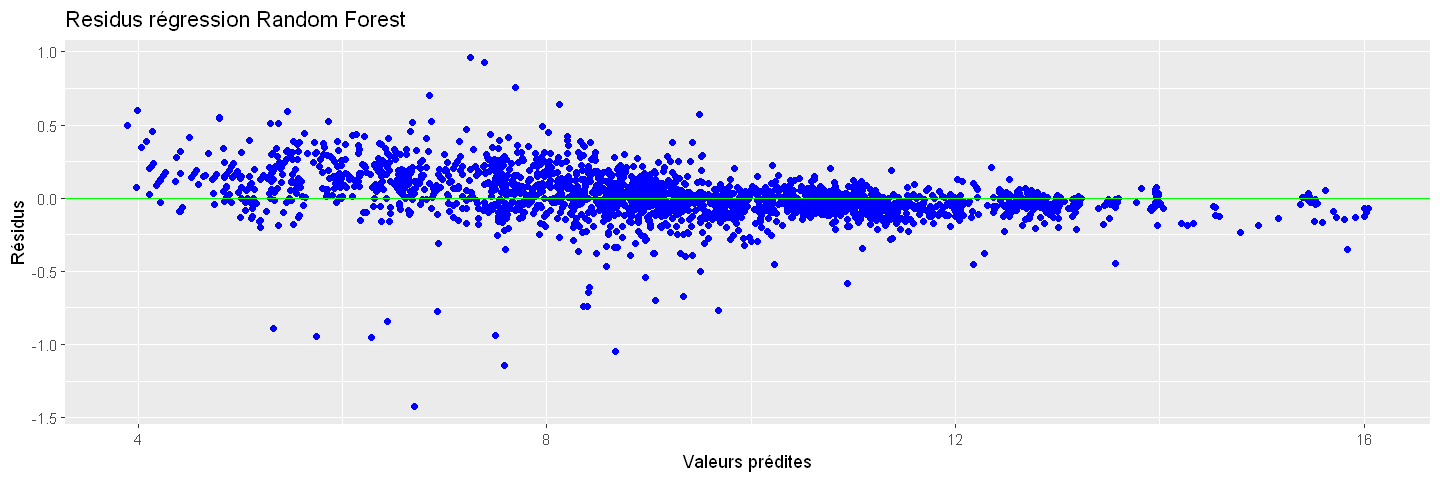

In [202]:
fit.far=fa.reg$predicted
res.far=fit.far-data_appr[,"L_Value_CO2"]
gplot.res(fit.far,res.far,titre="Residus régression Random Forest")

***Interprétation:***

Les résidus sont mals centrés et de variance importante principalement sur les valeurs inférieurs à 10. 

### Importance des variables 

L_Elec_from_fossils              L_Land_area                L_Density 
                   54.86                    36.64                    30.86 
  L_Elec_from_renewables          Low_carbon_elec                Longitude 
                   28.08                    24.68                    23.86 
L_Energy_intensity_level                 Latitude             L_Gdp_capita 
                   22.50                    20.86                    19.62 
  Renewable_energy_share      L_Elec_from_nuclear       L_Prim_energy_cons 
                   18.58                    16.39                    16.25 
         Access_to_fuels           Access_to_elec               Gdp_growth 
                   15.59                    14.40                     8.40 
                    Year 
                   -2.11

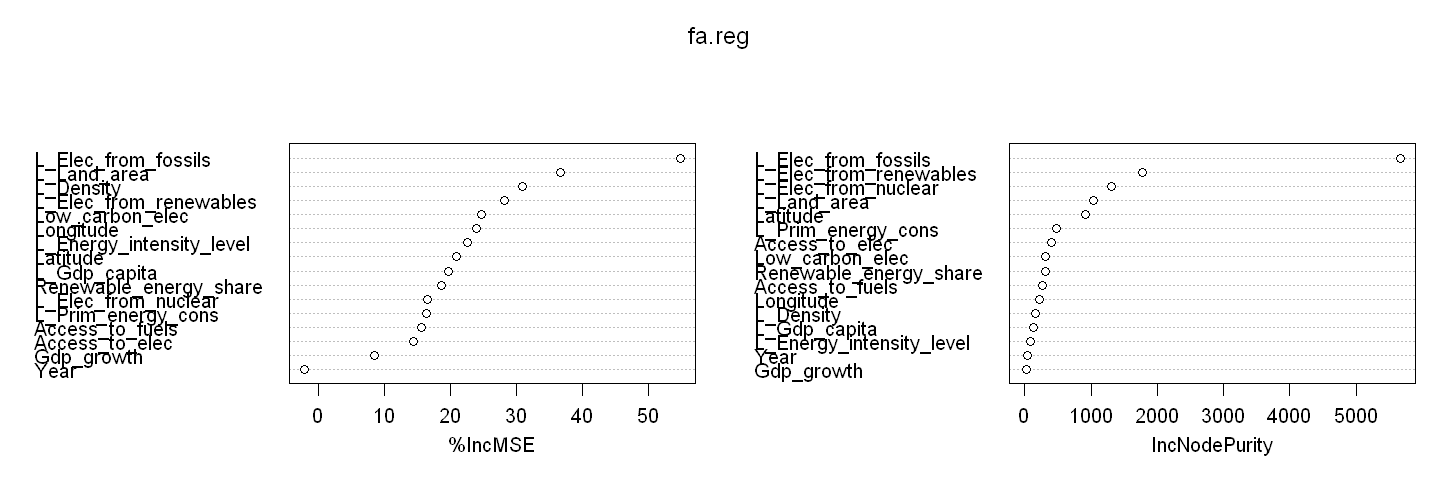

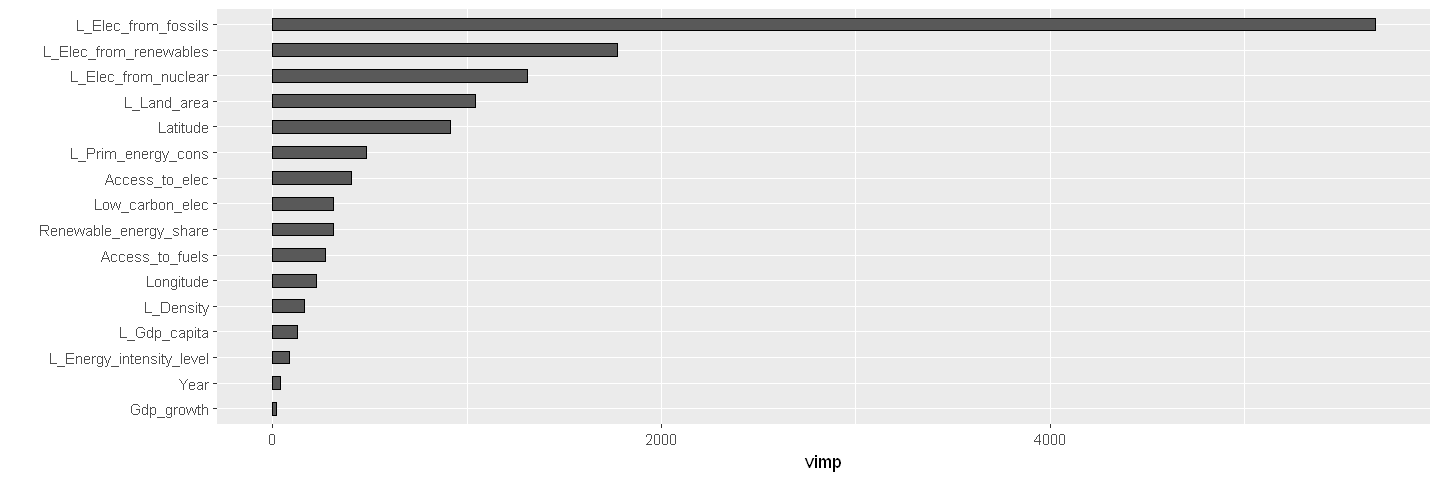

In [146]:
sort(round(importance(fa.reg), 2)[,1], decreasing=TRUE)
varImpPlot(fa.reg)
plot(gg_vimp(fa.reg))

***Interprétatin:***

Prenons en compte la methode par indice de Node Purity,elle nous indique que L_Elec_from_fossil , L_Elec_from_renawables , L_Elec_from_nuclear ... sont les variables participant le plus à l'interprétation. 

### Prévison de l'échantillon test 

#### Erreur de régression 

In [203]:
pred.far=fa.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.far-data_test[,"L_Value_CO2"])^2)/nrow(data_test)

[1] 0.028042

#### Erreur de classificaiton 

In [150]:
table(pred.far>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   338    6
  TRUE      1  227

## Boosting 

In [152]:
library(gbm)

Warning message:
"le package 'gbm' a été compilé avec la version R 4.3.3"
Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [155]:
boost.reg = gbm(L_Value_CO2 ~ ., data = data_appr, distribution = "gaussian", n.trees = 10000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

#### Recherche des meilleurs paramètres

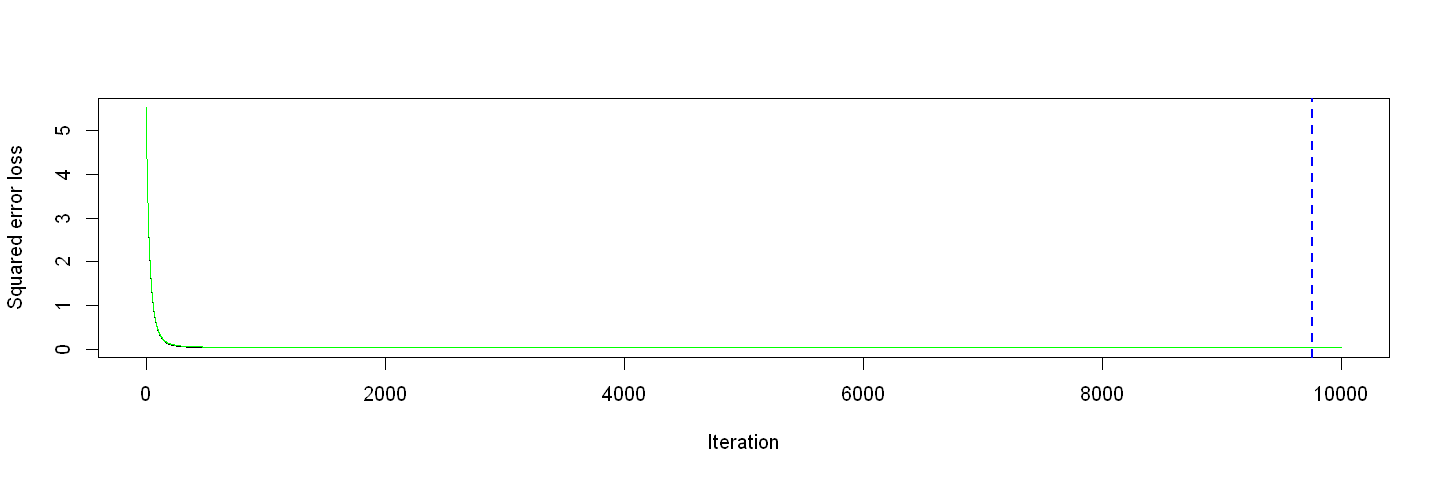

In [156]:
best.iter=gbm.perf(boost.reg,method="cv")

***Interpretation :***

Il faut un peu moins de 10000 arbres pour avoir le meilleur modèle. 

### Prévision de l'échantillon test

#### Erreur de régression 

In [160]:
pred.boostr=predict(boost.reg,newdata=data_test,n.trees=best.iter)
sum((pred.boostr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)

[1] 0.03607883

#### Erreur de classification 

In [159]:
table(pred.boostr>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   338    4
  TRUE      1  229

## Réseaux de neuronnes 

## Comparaison finale de toutes les méthodes 